In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


In [2]:
data=pd.read_csv("D:\\Downloads\\underr.csv")
data.head(10)

,Age,State,residence,education,drinking_water,toilet_facility,Religion,cooking_fuel,Wealth,Currently_pregnant,children,Currently_breastfeeding,marital_status,Births,Bmi
0,35-49,Rajasthan,Rural,No education,Safe,Hygenic,Hindu,Unimproved,Middle,No,three-four,No,Married,one-two,0
1,35-49,Jammu & Kashmir,Urban,Higher,Safe,Hygenic,Muslim,Improved,Rich,No,one-two,No,Married,No births,1
2,25-34,Chhattisgarh,Rural,No education,Safe,Hygenic,Hindu,Unimproved,Poor,No,No,No,Married,one-two,1
3,25-34,Jammu & Kashmir,Rural,Secondary,Safe,Hygenic,Hindu,Improved,Rich,No,one-two,No,Married,No births,1
4,15-24,Assam,Rural,Secondary,Safe,Hygenic,Muslim,Unimproved,Poor,No,No,No,Never in union,No births,1
5,25-34,Karnataka,Rural,Secondary,Safe,Hygenic,Hindu,Improved,Rich,No,one-two,No,Married,one-two,1
6,35-49,Madhya Pradesh,Rural,No education,Safe,Unhygenic,Hindu,Unimproved,Poor,No,one-two,No,Married,No births,1
7,25-34,Odisha,Rural,Secondary,Safe,Hygenic,Hindu,Improved,Middle,No,one-two,No,Married,one-two,1
8,25-34,Haryana,Urban,Secondary,Safe,Hygenic,Hindu,Improved,Rich,No,No,No,Never in union,No births,1
9,25-34,Madhya Pradesh,Rural,Secondary,Safe,Hygenic,Hindu,Unimproved,Middle,No,one-two,Yes,Married,No births,1


In [3]:
data.shape

(681818, 15)

In [4]:
data.isnull().sum()

Age                        0
State                      0
residence                  0
education                  0
drinking_water             0
toilet_facility            0
Religion                   0
cooking_fuel               0
Wealth                     0
Currently_pregnant         0
children                   0
Currently_breastfeeding    0
marital_status             0
Births                     0
Bmi                        0
dtype: int64

In [5]:
dummies_state = pd.get_dummies(data.State, dtype=int)
dummies_state.head(10)

,Andaman & Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Dadra & Nagar Haveli And Daman & Diu,Goa,Gujarat,...,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
dummies_age = pd.get_dummies(data.Age, dtype=int)
dummies_age.head(10)

,15-24,25-34,35-49
0,0,0,1
1,0,0,1
2,0,1,0
3,0,1,0
4,1,0,0
5,0,1,0
6,0,0,1
7,0,1,0
8,0,1,0
9,0,1,0


In [7]:
dummies_res = pd.get_dummies(data.residence, dtype=int)
dummies_res.head(10)

,Rural,Urban
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,0,1
9,1,0


In [8]:
dummies_edu = pd.get_dummies(data.education, dtype=int)
dummies_edu.head(10)

,Higher,No education,Primary,Secondary
0,0,1,0,0
1,1,0,0,0
2,0,1,0,0
3,0,0,0,1
4,0,0,0,1
5,0,0,0,1
6,0,1,0,0
7,0,0,0,1
8,0,0,0,1
9,0,0,0,1


In [9]:
dummies_water = pd.get_dummies(data.drinking_water, dtype=int)
dummies_water.head(10)

,Safe,Unsafe
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [10]:
dummies_toilet = pd.get_dummies(data.toilet_facility, dtype=int)
dummies_toilet.head(10)

,Hygenic,Unhygenic
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,0,1
7,1,0
8,1,0
9,1,0


In [11]:
dummies_religion = pd.get_dummies(data.Religion, dtype=int)
dummies_religion.head(10)

,Christian,Hindu,Muslim,Other
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,1,0
5,0,1,0,0
6,0,1,0,0
7,0,1,0,0
8,0,1,0,0
9,0,1,0,0


In [12]:
dummies_fuel = pd.get_dummies(data.cooking_fuel, dtype=int)
dummies_fuel.head(10)

,Improved,Unimproved
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
5,1,0
6,0,1
7,1,0
8,1,0
9,0,1


In [13]:
dummies_wealth = pd.get_dummies(data.Wealth, dtype=int)
dummies_wealth.head(10)

,Middle,Poor,Rich
0,1,0,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,0
5,0,0,1
6,0,1,0
7,1,0,0
8,0,0,1
9,1,0,0


In [14]:
dummies_pregnant = pd.get_dummies(data.Currently_pregnant, dtype=int)
dummies_pregnant.head(10)

,No,Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [15]:
dummies_children = pd.get_dummies(data.children, dtype=int)
dummies_children.head(10)

,No,five or more,one-two,three-four
0,0,0,0,1
1,0,0,1,0
2,1,0,0,0
3,0,0,1,0
4,1,0,0,0
5,0,0,1,0
6,0,0,1,0
7,0,0,1,0
8,1,0,0,0
9,0,0,1,0


In [16]:
dummies_breastfeeding = pd.get_dummies(data.Currently_breastfeeding, dtype=int)
dummies_breastfeeding.head(10)

,No,Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,0,1


In [17]:
dummies_marital = pd.get_dummies(data.marital_status, dtype=int)
dummies_marital.head(10)

,Divorced,Married,Never in union,Widowed,together/separated
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0
5,0,1,0,0,0
6,0,1,0,0,0
7,0,1,0,0,0
8,0,0,1,0,0
9,0,1,0,0,0


In [18]:
dummies_births = pd.get_dummies(data.Births, dtype=int)
dummies_births.head(10)

,No births,five or more,one-two,three-four
0,0,0,1,0
1,1,0,0,0
2,0,0,1,0
3,1,0,0,0
4,1,0,0,0
5,0,0,1,0
6,1,0,0,0
7,0,0,1,0
8,1,0,0,0
9,1,0,0,0


In [19]:
data1 = pd.concat([data,dummies_age,dummies_state,dummies_res,dummies_edu,dummies_water,dummies_toilet,dummies_fuel,dummies_wealth,dummies_pregnant,dummies_children,dummies_breastfeeding,dummies_marital,dummies_births],axis='columns')
data1

,Age,State,residence,education,drinking_water,toilet_facility,Religion,cooking_fuel,Wealth,Currently_pregnant,...,Yes,Divorced,Married,Never in union,Widowed,together/separated,No births,five or more,one-two,three-four
0,35-49,Rajasthan,Rural,No education,Safe,Hygenic,Hindu,Unimproved,Middle,No,...,0,0,1,0,0,0,0,0,1,0
1,35-49,Jammu & Kashmir,Urban,Higher,Safe,Hygenic,Muslim,Improved,Rich,No,...,0,0,1,0,0,0,1,0,0,0
2,25-34,Chhattisgarh,Rural,No education,Safe,Hygenic,Hindu,Unimproved,Poor,No,...,0,0,1,0,0,0,0,0,1,0
3,25-34,Jammu & Kashmir,Rural,Secondary,Safe,Hygenic,Hindu,Improved,Rich,No,...,0,0,1,0,0,0,1,0,0,0
4,15-24,Assam,Rural,Secondary,Safe,Hygenic,Muslim,Unimproved,Poor,No,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681813,35-49,Kerala,Rural,Secondary,Safe,Hygenic,Hindu,Improved,Rich,No,...,0,0,1,0,0,0,1,0,0,0
681814,35-49,Assam,Rural,Primary,Safe,Hygenic,Hindu,Unimproved,Middle,No,...,0,0,1,0,0,0,1,0,0,0
681815,25-34,Tripura,Urban,Secondary,Safe,Hygenic,Hindu,Improved,Middle,No,...,0,0,1,0,0,0,1,0,0,0
681816,35-49,Odisha,Rural,Primary,Unsafe,Hygenic,Hindu,Unimproved,Poor,No,...,0,0,0,0,1,0,1,0,0,0


In [20]:
# Assuming 'df' is your DataFrame
# List the columns you want to remove
columns_to_remove = ['Age', 'State','residence', 'education', 'drinking_water', 'toilet_facility','Religion', 'cooking_fuel', 'Wealth', 'Currently_pregnant', 'children', 'Currently_breastfeeding', 'marital_status', 'Births']


# Read your dataset into a DataFrame
df = data1

# Drop the specified columns
df.drop(columns=columns_to_remove, inplace=True)


In [21]:
df.head()

,Bmi,15-24,25-34,35-49,Andaman & Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,...,Yes,Divorced,Married,Never in union,Widowed,together/separated,No births,five or more,one-two,three-four
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0


In [22]:
df.shape

(681818, 72)

In [23]:
X = df.drop('Bmi',axis = 'columns')
X.head()

,15-24,25-34,35-49,Andaman & Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,...,Yes,Divorced,Married,Never in union,Widowed,together/separated,No births,five or more,one-two,three-four
0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [24]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

X = df.drop('Bmi', axis='columns')
print(X.head(15)) 

    15-24  25-34  35-49  Andaman & Nicobar Islands  Andhra Pradesh  \
0       0      0      1                          0               0   
1       0      0      1                          0               0   
2       0      1      0                          0               0   
3       0      1      0                          0               0   
4       1      0      0                          0               0   
5       0      1      0                          0               0   
6       0      0      1                          0               0   
7       0      1      0                          0               0   
8       0      1      0                          0               0   
9       0      1      0                          0               0   
10      1      0      0                          0               0   
11      0      0      1                          0               0   
12      0      0      1                          0               0   
13      0      0    

In [25]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

X = df.drop('Bmi', axis='columns')
print(X.tail(25)) 

        15-24  25-34  35-49  Andaman & Nicobar Islands  Andhra Pradesh  \
681793      0      0      1                          0               0   
681794      1      0      0                          0               0   
681795      1      0      0                          0               0   
681796      0      0      1                          0               0   
681797      1      0      0                          0               0   
681798      1      0      0                          0               0   
681799      1      0      0                          0               0   
681800      1      0      0                          0               0   
681801      0      0      1                          0               0   
681802      0      0      1                          0               0   
681803      0      1      0                          0               0   
681804      1      0      0                          0               0   
681805      1      0      0           

In [26]:
y = df.Bmi
y.head(15)


0     0
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    0
12    1
13    1
14    1
Name: Bmi, dtype: int64

In [27]:
y = df.Bmi
y.tail(25)


681793    1
681794    1
681795    1
681796    1
681797    1
681798    0
681799    1
681800    1
681801    1
681802    1
681803    1
681804    1
681805    1
681806    1
681807    1
681808    1
681809    0
681810    1
681811    1
681812    1
681813    1
681814    1
681815    1
681816    1
681817    1
Name: Bmi, dtype: int64

In [28]:
X.shape

(681818, 71)

In [29]:
y.shape

(681818,)

Train Test split

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming X and y are your features and target variables respectively
model = RandomForestClassifier(n_estimators=500, random_state=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy Score: 0.8195471518792405
Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90    280084
           1       0.25      0.01      0.01     60825

    accuracy                           0.82    340909
   macro avg       0.54      0.50      0.46    340909
weighted avg       0.72      0.82      0.74    340909



In [26]:
#random forest K2
# Define the model
model = RandomForestClassifier(n_estimators=50, random_state=100)

# Define k-fold cross-validation
kfold = KFold(n_splits=2, shuffle=True, random_state=100)

# Perform cross-validation
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # For regression, you might want to convert predicted values to discrete classes
    # For simplicity, let's round the predicted values to the nearest integer
    y_pred_rounded = [round(pred) for pred in y_pred]
    
    print(f"Classification Report for Fold {i+1}:")
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred_rounded)}")
    print(classification_report(y_test, y_pred_rounded))


Classification Report for Fold 1:
Accuracy Score: 0.8194327518487339
              precision    recall  f1-score   support

           0       0.82      1.00      0.90    280084
           1       0.25      0.01      0.01     60825

    accuracy                           0.82    340909
   macro avg       0.53      0.50      0.46    340909
weighted avg       0.72      0.82      0.74    340909

Classification Report for Fold 2:
Accuracy Score: 0.8195148852039694
              precision    recall  f1-score   support

           0       0.82      1.00      0.90    280100
           1       0.22      0.00      0.01     60809

    accuracy                           0.82    340909
   macro avg       0.52      0.50      0.45    340909
weighted avg       0.71      0.82      0.74    340909



In [28]:
# Define the model
model = RandomForestClassifier(n_estimators=50, random_state=100)

# Define k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=100)

# Perform cross-validation
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # For regression, you might want to convert predicted values to discrete classes
    # For simplicity, let's round the predicted values to the nearest integer
    y_pred_rounded = [round(pred) for pred in y_pred]
    
    print(f"Classification Report for Fold {i+1}:")
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred_rounded)}")
    print(classification_report(y_test, y_pred_rounded))


Classification Report for Fold 1:
Accuracy Score: 0.8199011469302748
              precision    recall  f1-score   support

           0       0.82      1.00      0.90    112044
           1       0.19      0.00      0.01     24320

    accuracy                           0.82    136364
   macro avg       0.51      0.50      0.45    136364
weighted avg       0.71      0.82      0.74    136364

Classification Report for Fold 2:
Accuracy Score: 0.8196518142618286
              precision    recall  f1-score   support

           0       0.82      1.00      0.90    111997
           1       0.21      0.00      0.01     24367

    accuracy                           0.82    136364
   macro avg       0.52      0.50      0.45    136364
weighted avg       0.71      0.82      0.74    136364

Classification Report for Fold 3:
Accuracy Score: 0.8205538118565017
              precision    recall  f1-score   support

           0       0.82      1.00      0.90    112093
           1       0.23      0

In [29]:
# Define the model
model = RandomForestClassifier(n_estimators=50, random_state=100)

# Define k-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=100)

# Perform cross-validation
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # For regression, you might want to convert predicted values to discrete classes
    # For simplicity, let's round the predicted values to the nearest integer
    y_pred_rounded = [round(pred) for pred in y_pred]
    
    print(f"Classification Report for Fold {i+1}:")
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred_rounded)}")
    print(classification_report(y_test, y_pred_rounded))

Classification Report for Fold 1:
Accuracy Score: 0.8190871491009357
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     55941
           1       0.18      0.00      0.00     12241

    accuracy                           0.82     68182
   macro avg       0.50      0.50      0.45     68182
weighted avg       0.71      0.82      0.74     68182

Classification Report for Fold 2:
Accuracy Score: 0.8209791440556159
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     56103
           1       0.19      0.00      0.01     12079

    accuracy                           0.82     68182
   macro avg       0.51      0.50      0.45     68182
weighted avg       0.71      0.82      0.74     68182

Classification Report for Fold 3:
Accuracy Score: 0.8206418116218357
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     56042
           1       0.26      0

Naive Bayes

In [30]:
# Naive Bayes
model = GaussianNB()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy Score: 0.7459116176060779
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84     55958
           1       0.34      0.43      0.38     12223

    accuracy                           0.75     68181
   macro avg       0.60      0.62      0.61     68181
weighted avg       0.77      0.75      0.76     68181



Decision Tree

In [35]:
# Decision Tree
model = DecisionTreeClassifier(random_state=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy Score: 0.8188791598832519
Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     55958
           1       0.16      0.00      0.00     12223

    accuracy                           0.82     68181
   macro avg       0.49      0.50      0.45     68181
weighted avg       0.70      0.82      0.74     68181



In [32]:
# Decision tree k2
model = DecisionTreeClassifier(random_state=100)

# Define k-fold cross-validation
kfold = KFold(n_splits=2, shuffle=True, random_state=100)

# Perform cross-validation
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # For regression, you might want to convert predicted values to discrete classes
    # For simplicity, let's round the predicted values to the nearest integer
    y_pred_rounded = [round(pred) for pred in y_pred]
    
    print(f"Classification Report for Fold {i+1}:")
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred_rounded)}")
    print(classification_report(y_test, y_pred_rounded))


Classification Report for Fold 1:
Accuracy Score: 0.8193066184817649
              precision    recall  f1-score   support

           0       0.82      1.00      0.90    280084
           1       0.23      0.01      0.01     60825

    accuracy                           0.82    340909
   macro avg       0.53      0.50      0.46    340909
weighted avg       0.72      0.82      0.74    340909

Classification Report for Fold 2:
Accuracy Score: 0.8192831518088405
              precision    recall  f1-score   support

           0       0.82      1.00      0.90    280100
           1       0.20      0.00      0.01     60809

    accuracy                           0.82    340909
   macro avg       0.51      0.50      0.45    340909
weighted avg       0.71      0.82      0.74    340909



In [33]:
# Decision tree k5
model = DecisionTreeClassifier(random_state=100)

# Define k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=100)

# Perform cross-validation
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # For regression, you might want to convert predicted values to discrete classes
    # For simplicity, let's round the predicted values to the nearest integer
    y_pred_rounded = [round(pred) for pred in y_pred]
    
    print(f"Classification Report for Fold {i+1}:")
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred_rounded)}")
    print(classification_report(y_test, y_pred_rounded))


Classification Report for Fold 1:
Accuracy Score: 0.8198644803613857
              precision    recall  f1-score   support

           0       0.82      1.00      0.90    112044
           1       0.18      0.00      0.01     24320

    accuracy                           0.82    136364
   macro avg       0.50      0.50      0.45    136364
weighted avg       0.71      0.82      0.74    136364

Classification Report for Fold 2:
Accuracy Score: 0.81984981373383
              precision    recall  f1-score   support

           0       0.82      1.00      0.90    111997
           1       0.20      0.00      0.01     24367

    accuracy                           0.82    136364
   macro avg       0.51      0.50      0.45    136364
weighted avg       0.71      0.82      0.74    136364

Classification Report for Fold 3:
Accuracy Score: 0.8204878120325012
              precision    recall  f1-score   support

           0       0.82      1.00      0.90    112093
           1       0.22      0.0

In [34]:
# Decision tree k10
model = DecisionTreeClassifier(random_state=100)

# Define k-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=100)

# Perform cross-validation
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # For regression, you might want to convert predicted values to discrete classes
    # For simplicity, let's round the predicted values to the nearest integer
    y_pred_rounded = [round(pred) for pred in y_pred]
    
    print(f"Classification Report for Fold {i+1}:")
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred_rounded)}")
    print(classification_report(y_test, y_pred_rounded))


Classification Report for Fold 1:
Accuracy Score: 0.8190578158458244
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     55941
           1       0.17      0.00      0.00     12241

    accuracy                           0.82     68182
   macro avg       0.49      0.50      0.45     68182
weighted avg       0.70      0.82      0.74     68182

Classification Report for Fold 2:
Accuracy Score: 0.8212871432342848
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     56103
           1       0.20      0.00      0.01     12079

    accuracy                           0.82     68182
   macro avg       0.51      0.50      0.45     68182
weighted avg       0.71      0.82      0.74     68182

Classification Report for Fold 3:
Accuracy Score: 0.820759144642281
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     56042
           1       0.25      0.

ANN

In [31]:
from sklearn.metrics import accuracy_score, f1_score
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = model.predict(X_test)
# Convert probabilities to binary labels
threshold = 0.5
y_pred = (y_pred > threshold).astype(int)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


Epoch 1/20
17046/17046 ━━━━━━━━━━━━━━━━━━━━ 77s 4ms/step - accuracy: 0.8215 - loss: 0.4187 - val_accuracy: 0.8220 - val_loss: 0.4131
Epoch 2/20
17046/17046 ━━━━━━━━━━━━━━━━━━━━ 90s 4ms/step - accuracy: 0.8222 - loss: 0.4123 - val_accuracy: 0.8226 - val_loss: 0.4125
Epoch 3/20
17046/17046 ━━━━━━━━━━━━━━━━━━━━ 102s 5ms/step - accuracy: 0.8220 - loss: 0.4124 - val_accuracy: 0.8220 - val_loss: 0.4133
Epoch 4/20
17046/17046 ━━━━━━━━━━━━━━━━━━━━ 131s 5ms/step - accuracy: 0.8218 - loss: 0.4125 - val_accuracy: 0.8227 - val_loss: 0.4121
Epoch 5/20
17046/17046 ━━━━━━━━━━━━━━━━━━━━ 126s 4ms/step - accuracy: 0.8214 - loss: 0.4121 - val_accuracy: 0.8227 - val_loss: 0.4128
Epoch 6/20
17046/17046 ━━━━━━━━━━━━━━━━━━━━ 81s 5ms/step - accuracy: 0.8219 - loss: 0.4120 - val_accuracy: 0.8226 - val_loss: 0.4120
Epoch 7/20
17046/17046 ━━━━━━━━━━━━━━━━━━━━ 66s 4ms/step - accuracy: 0.8220 - loss: 0.4103 - val_accuracy: 0.8227 - val_loss: 0.4123
Epoch 8/20
17046/17046 ━━━━━━━━━━━━━━━━━━━━ 87s 4ms/step - accurac

In [32]:
# ANN K2
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

# Split the data into K folds
kf = KFold(n_splits=2, shuffle=True)

# Initialize lists to store evaluation metrics
accuracies = []
f1_scores = []

# Iterate through each fold
for train_index, test_index in kf.split(X_train):
    # Split data into train and test sets for this fold
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # Define the model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    model.fit(X_train_fold, y_train_fold, epochs=20, batch_size=32, validation_data=(X_test_fold, y_test_fold), verbose=0)

    # Evaluate the model
    y_pred_fold = model.predict(X_test_fold)

    # Calculate accuracy and F1 score for this fold
    accuracy_fold = accuracy_score(y_test_fold, (y_pred_fold > 0.5).astype(int))
    
    # Append evaluation metrics to lists
    accuracies.append(accuracy_fold)
    
# Calculate mean and standard deviation of evaluation metrics
mean_accuracy = np.mean(accuracies)
print("Mean Accuracy:", mean_accuracy)


8523/8523 ━━━━━━━━━━━━━━━━━━━━ 8s 952us/step
8523/8523 ━━━━━━━━━━━━━━━━━━━━ 9s 998us/step
Mean Accuracy: 0.8216054882721548


In [33]:
# ANN K5
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

# Split the data into K folds
kf = KFold(n_splits=5, shuffle=True)

# Initialize lists to store evaluation metrics
accuracies = []
f1_scores = []

# Iterate through each fold
for train_index, test_index in kf.split(X_train):
    # Split data into train and test sets for this fold
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # Define the model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    model.fit(X_train_fold, y_train_fold, epochs=20, batch_size=32, validation_data=(X_test_fold, y_test_fold), verbose=0)

    # Evaluate the model
    y_pred_fold = model.predict(X_test_fold)

    # Calculate accuracy and F1 score for this fold
    accuracy_fold = accuracy_score(y_test_fold, (y_pred_fold > 0.5).astype(int))
    # Append evaluation metrics to lists
    accuracies.append(accuracy_fold)
   
# Calculate mean and standard deviation of evaluation metrics
mean_accuracy = np.mean(accuracies)

print("Mean Accuracy:", mean_accuracy)


3410/3410 ━━━━━━━━━━━━━━━━━━━━ 3s 875us/step
3410/3410 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3410/3410 ━━━━━━━━━━━━━━━━━━━━ 3s 917us/step
3410/3410 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3410/3410 ━━━━━━━━━━━━━━━━━━━━ 3s 839us/step
Mean Accuracy: 0.8220124885893728


In [34]:
# ANN K10
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

# Split the data into K folds
kf = KFold(n_splits=10, shuffle=True)

# Initialize lists to store evaluation metrics
accuracies = []
f1_scores = []

# Iterate through each fold
for train_index, test_index in kf.split(X_train):
    # Split data into train and test sets for this fold
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # Define the model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    model.fit(X_train_fold, y_train_fold, epochs=20, batch_size=32, validation_data=(X_test_fold, y_test_fold), verbose=0)

    # Evaluate the model
    y_pred_fold = model.predict(X_test_fold)

    # Calculate accuracy and F1 score for this fold
    accuracy_fold = accuracy_score(y_test_fold, (y_pred_fold > 0.5).astype(int))
    # Append evaluation metrics to lists
    accuracies.append(accuracy_fold)
    
# Calculate mean and standard deviation of evaluation metrics
mean_accuracy = np.mean(accuracies)
print("Mean Accuracy:", mean_accuracy)


1705/1705 ━━━━━━━━━━━━━━━━━━━━ 2s 896us/step
1705/1705 ━━━━━━━━━━━━━━━━━━━━ 2s 929us/step
1705/1705 ━━━━━━━━━━━━━━━━━━━━ 2s 892us/step
1705/1705 ━━━━━━━━━━━━━━━━━━━━ 2s 956us/step
1705/1705 ━━━━━━━━━━━━━━━━━━━━ 2s 910us/step
1705/1705 ━━━━━━━━━━━━━━━━━━━━ 2s 890us/step
1705/1705 ━━━━━━━━━━━━━━━━━━━━ 2s 953us/step
1705/1705 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1705/1705 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1705/1705 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Mean Accuracy: 0.8217943294029337


MLP

In [47]:
#MLP
# Define the model
model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=100)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print accuracy score and classification report
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8211428856381028
Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90    280084
           1       0.25      0.00      0.00     60825

    accuracy                           0.82    340909
   macro avg       0.53      0.50      0.45    340909
weighted avg       0.72      0.82      0.74    340909



In [48]:
#MLP k2
# Define the model
model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=100)

# Define k-fold cross-validation
kfold = KFold(n_splits=2, shuffle=True, random_state=100)

# Perform cross-validation
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Standardize features by removing the mean and scaling to unit variance
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    print(f"Classification Report for Fold {i+1}:")
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred.round()))

Classification Report for Fold 1:
Accuracy Score: 0.8210695522852139
              precision    recall  f1-score   support

           0       0.82      1.00      0.90    280084
           1       0.32      0.00      0.00     60825

    accuracy                           0.82    340909
   macro avg       0.57      0.50      0.45    340909
weighted avg       0.73      0.82      0.74    340909

Classification Report for Fold 2:
Accuracy Score: 0.8206471521725739
              precision    recall  f1-score   support

           0       0.82      1.00      0.90    280100
           1       0.24      0.00      0.01     60809

    accuracy                           0.82    340909
   macro avg       0.53      0.50      0.45    340909
weighted avg       0.72      0.82      0.74    340909



In [49]:
#MLP k5
# Define the model
model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=100)

# Define k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=100)

# Perform cross-validation
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Standardize features by removing the mean and scaling to unit variance
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    print(f"Classification Report for Fold {i+1}:")
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred.round()))

Classification Report for Fold 1:
Accuracy Score: 0.8216538089231762
              precision    recall  f1-score   support

           0       0.82      1.00      0.90    112044
           1       0.00      0.00      0.00     24320

    accuracy                           0.82    136364
   macro avg       0.41      0.50      0.45    136364
weighted avg       0.68      0.82      0.74    136364



D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for Fold 2:
Accuracy Score: 0.821316476489396
              precision    recall  f1-score   support

           0       0.82      1.00      0.90    111997
           1       1.00      0.00      0.00     24367

    accuracy                           0.82    136364
   macro avg       0.91      0.50      0.45    136364
weighted avg       0.85      0.82      0.74    136364

Classification Report for Fold 3:
Accuracy Score: 0.8219911413569564
              precision    recall  f1-score   support

           0       0.82      1.00      0.90    112093
           1       0.00      0.00      0.00     24271

    accuracy                           0.82    136364
   macro avg       0.41      0.50      0.45    136364
weighted avg       0.68      0.82      0.74    136364

Classification Report for Fold 4:
Accuracy Score: 0.8225105050490236
              precision    recall  f1-score   support

           0       0.82      1.00      0.90    112161
           1       0.33      0.

In [50]:
#MLP k10
# Define the model
model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=100)

# Define k-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=100)

# Perform cross-validation
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Standardize features by removing the mean and scaling to unit variance
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    print(f"Classification Report for Fold {i+1}:")
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred.round()))

Classification Report for Fold 1:
Accuracy Score: 0.8204658120911678
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     55941
           1       0.00      0.00      0.00     12241

    accuracy                           0.82     68182
   macro avg       0.41      0.50      0.45     68182
weighted avg       0.67      0.82      0.74     68182



D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for Fold 2:
Accuracy Score: 0.8228418057551846
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     56103
           1       0.00      0.00      0.00     12079

    accuracy                           0.82     68182
   macro avg       0.41      0.50      0.45     68182
weighted avg       0.68      0.82      0.74     68182



D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for Fold 3:
Accuracy Score: 0.8219471414742894
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     56042
           1       0.00      0.00      0.00     12140

    accuracy                           0.82     68182
   macro avg       0.41      0.50      0.45     68182
weighted avg       0.68      0.82      0.74     68182



D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for Fold 4:
Accuracy Score: 0.820671144876947
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     55955
           1       0.00      0.00      0.00     12227

    accuracy                           0.82     68182
   macro avg       0.41      0.50      0.45     68182
weighted avg       0.67      0.82      0.74     68182



D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for Fold 5:
Accuracy Score: 0.8219324748467337
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     56044
           1       0.00      0.00      0.00     12138

    accuracy                           0.82     68182
   macro avg       0.41      0.50      0.45     68182
weighted avg       0.68      0.82      0.74     68182

Classification Report for Fold 6:
Accuracy Score: 0.8220204746120677
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     56049
           1       0.00      0.00      0.00     12133

    accuracy                           0.82     68182
   macro avg       0.41      0.50      0.45     68182
weighted avg       0.68      0.82      0.74     68182

Classification Report for Fold 7:
Accuracy Score: 0.8222111407702912
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     56060
           1       0.00      0

D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for Fold 8:
Accuracy Score: 0.822827139127629
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     56102
           1       0.00      0.00      0.00     12080

    accuracy                           0.82     68182
   macro avg       0.41      0.50      0.45     68182
weighted avg       0.68      0.82      0.74     68182



D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for Fold 9:
Accuracy Score: 0.8203165104647923
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     55930
           1       0.00      0.00      0.00     12251

    accuracy                           0.82     68181
   macro avg       0.41      0.50      0.45     68181
weighted avg       0.67      0.82      0.74     68181



D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for Fold 10:
Accuracy Score: 0.820727182059518
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     55958
           1       0.00      0.00      0.00     12223

    accuracy                           0.82     68181
   macro avg       0.41      0.50      0.45     68181
weighted avg       0.67      0.82      0.74     68181



D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNN

In [51]:
# KNN
model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy Score: 0.7812880421231722
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87     55958
           1       0.32      0.19      0.24     12223

    accuracy                           0.78     68181
   macro avg       0.58      0.55      0.56     68181
weighted avg       0.74      0.78      0.76     68181



In [33]:
# KNN K2
model = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors as per your requirement

# Define k-fold cross-validation
kfold = KFold(n_splits=2, shuffle=True, random_state=100)

# Perform cross-validation
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"Classification Report for Fold {i+1}:")
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))


Classification Report for Fold 1:
Accuracy Score: 0.7981044794945279
              precision    recall  f1-score   support

           0       0.83      0.95      0.89    280084
           1       0.27      0.08      0.12     60825

    accuracy                           0.80    340909
   macro avg       0.55      0.52      0.50    340909
weighted avg       0.73      0.80      0.75    340909

Classification Report for Fold 2:
Accuracy Score: 0.7981308795015679
              precision    recall  f1-score   support

           0       0.83      0.95      0.89    280100
           1       0.30      0.10      0.15     60809

    accuracy                           0.80    340909
   macro avg       0.57      0.53      0.52    340909
weighted avg       0.74      0.80      0.75    340909



In [34]:
# KNN K5
model = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors as per your requirement

# Define k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=100)

# Perform cross-validation
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"Classification Report for Fold {i+1}:")
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))


Classification Report for Fold 1:
Accuracy Score: 0.803379190988824
              precision    recall  f1-score   support

           0       0.83      0.96      0.89    112044
           1       0.29      0.07      0.11     24320

    accuracy                           0.80    136364
   macro avg       0.56      0.52      0.50    136364
weighted avg       0.73      0.80      0.75    136364

Classification Report for Fold 2:
Accuracy Score: 0.8021105277052595
              precision    recall  f1-score   support

           0       0.83      0.95      0.89    111997
           1       0.34      0.11      0.17     24367

    accuracy                           0.80    136364
   macro avg       0.58      0.53      0.53    136364
weighted avg       0.74      0.80      0.76    136364

Classification Report for Fold 3:
Accuracy Score: 0.7887345633744977
              precision    recall  f1-score   support

           0       0.83      0.93      0.88    112093
           1       0.30      0.

In [35]:
# KNN K10
model = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors as per your requirement

# Define k-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=100)

# Perform cross-validation
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"Classification Report for Fold {i+1}:")
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))


Classification Report for Fold 1:
Accuracy Score: 0.7938018831949781
              precision    recall  f1-score   support

           0       0.83      0.93      0.88     55941
           1       0.34      0.15      0.21     12241

    accuracy                           0.79     68182
   macro avg       0.58      0.54      0.55     68182
weighted avg       0.74      0.79      0.76     68182

Classification Report for Fold 2:
Accuracy Score: 0.8040831891114957
              precision    recall  f1-score   support

           0       0.83      0.96      0.89     56103
           1       0.28      0.07      0.11     12079

    accuracy                           0.80     68182
   macro avg       0.56      0.52      0.50     68182
weighted avg       0.73      0.80      0.75     68182

Classification Report for Fold 3:
Accuracy Score: 0.7908538910562906
              precision    recall  f1-score   support

           0       0.83      0.94      0.88     56042
           1       0.28      0

Hyperparamter Tuning

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Assuming X_train, X_test, y_train, y_test are your training and test data
# X_train and X_test are feature matrices, and y_train, y_test are target vectors

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters found:", grid_search.best_params_)

# Predictions using the best estimator
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


D:\anaconda\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\anaconda\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\anaconda\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesC

Best parameters found: {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.82      1.00      0.90    112094
           1       0.00      0.00      0.00     24270

    accuracy                           0.82    136364
   macro avg       0.41      0.50      0.45    136364
weighted avg       0.68      0.82      0.74    136364



D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest


Average Sensitivity (SE): 0.8060246108586929
Average Specificity (SP): 0.3859115504717885
Average Positive Predictive Value (PPV): 0.6637564751287587
Average Negative Predictive Value (NPV): 0.5695984951480242
Average F1-score (FM): 0.7279892127083168


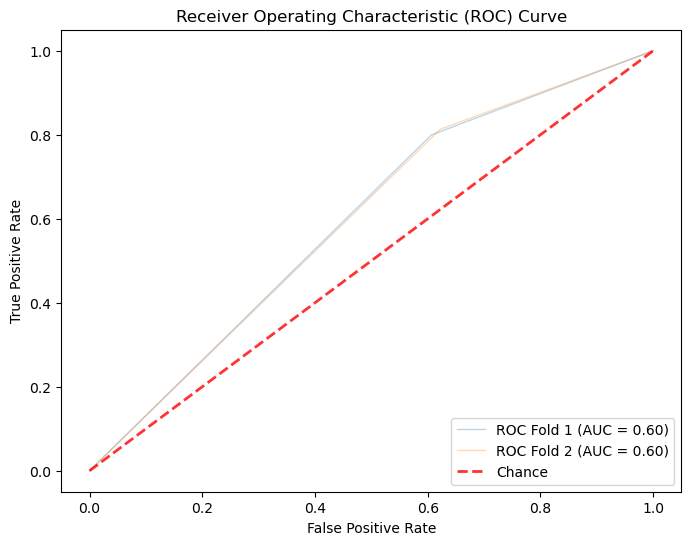

In [34]:
#run
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Random forest K2
model = RandomForestClassifier(n_estimators=500, random_state=100)

# Define k-fold cross-validation
kfold = KFold(n_splits=2, shuffle=True, random_state=100)

# Initialize lists to store evaluation metrics
sensitivity_scores = []
specificity_scores = []
ppv_scores = []
npv_scores = []
f1_scores = []
accuracy_scores = []
mean_fpr = np.linspace(0, 1, 100)

# Initialize figure for ROC curve
plt.figure(figsize=(8, 6))

# Perform cross-validation
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # For classification, you don't need to round predicted values
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Calculate Sensitivity (True Positive Rate)
    sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    sensitivity_scores.append(sensitivity)
    
    # Calculate Specificity (True Negative Rate)
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    specificity_scores.append(specificity)
    
    # Calculate Positive Predictive Value (Precision)
    ppv = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    ppv_scores.append(ppv)
    
    # Calculate Negative Predictive Value
    npv = cm[0, 0] / (cm[0, 0] + cm[1, 0])
    npv_scores.append(npv)
    
    # Calculate F1-score
    f1 = 2 * (ppv * sensitivity) / (ppv + sensitivity)
    f1_scores.append(f1)
    
    # Calculate Accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label=f'ROC Fold {i+1} (AUC = {roc_auc:.2f})')

# Compute average scores across all folds
avg_sensitivity = sum(sensitivity_scores) / len(sensitivity_scores)
avg_specificity = sum(specificity_scores) / len(specificity_scores)
avg_ppv = sum(ppv_scores) / len(ppv_scores)
avg_npv = sum(npv_scores) / len(npv_scores)
avg_f1 = sum(f1_scores) / len(f1_scores)
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)

# Print average evaluation metrics
print("\nAverage Sensitivity (SE):", avg_sensitivity)
print("Average Specificity (SP):", avg_specificity)
print("Average Positive Predictive Value (PPV):", avg_ppv)
print("Average Negative Predictive Value (NPV):", avg_npv)
print("Average F1-score (FM):", avg_f1)
#print("Average Accuracy Score:", avg_accuracy)

# Plot ROC curve
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=0.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



Average Sensitivity (SE): 0.8112516826997117
Average Specificity (SP): 0.3805164595963406
Average Positive Predictive Value (PPV): 0.6632384921463621
Average Negative Predictive Value (NPV): 0.5727490990634363
Average F1-score (FM): 0.729812820604027


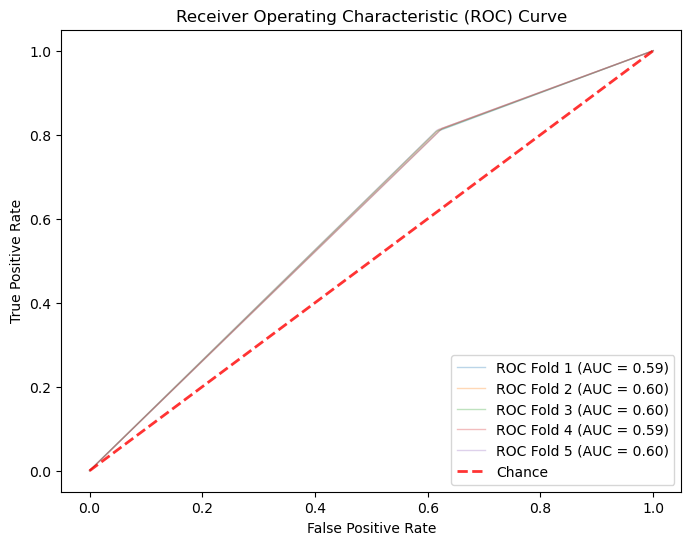

In [35]:
#run
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Random forest K5
model = RandomForestClassifier(n_estimators=500, random_state=100)

# Define k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=100)

# Initialize lists to store evaluation metrics
sensitivity_scores = []
specificity_scores = []
ppv_scores = []
npv_scores = []
f1_scores = []
accuracy_scores = []
mean_fpr = np.linspace(0, 1, 100)

# Initialize figure for ROC curve
plt.figure(figsize=(8, 6))

# Perform cross-validation
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # For classification, you don't need to round predicted values
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Calculate Sensitivity (True Positive Rate)
    sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    sensitivity_scores.append(sensitivity)
    
    # Calculate Specificity (True Negative Rate)
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    specificity_scores.append(specificity)
    
    # Calculate Positive Predictive Value (Precision)
    ppv = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    ppv_scores.append(ppv)
    
    # Calculate Negative Predictive Value
    npv = cm[0, 0] / (cm[0, 0] + cm[1, 0])
    npv_scores.append(npv)
    
    # Calculate F1-score
    f1 = 2 * (ppv * sensitivity) / (ppv + sensitivity)
    f1_scores.append(f1)
    
    # Calculate Accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label=f'ROC Fold {i+1} (AUC = {roc_auc:.2f})')

# Compute average scores across all folds
avg_sensitivity = sum(sensitivity_scores) / len(sensitivity_scores)
avg_specificity = sum(specificity_scores) / len(specificity_scores)
avg_ppv = sum(ppv_scores) / len(ppv_scores)
avg_npv = sum(npv_scores) / len(npv_scores)
avg_f1 = sum(f1_scores) / len(f1_scores)
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)

# Print average evaluation metrics
print("\nAverage Sensitivity (SE):", avg_sensitivity)
print("Average Specificity (SP):", avg_specificity)
print("Average Positive Predictive Value (PPV):", avg_ppv)
print("Average Negative Predictive Value (NPV):", avg_npv)
print("Average F1-score (FM):", avg_f1)
#print("Average Accuracy Score:", avg_accuracy)

# Plot ROC curve
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=0.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



Average Sensitivity (SE): 0.8111414755349561
Average Specificity (SP): 0.381669999774089
Average Positive Predictive Value (PPV): 0.6636225898009057
Average Negative Predictive Value (NPV): 0.5733417401954576
Average F1-score (FM): 0.7300007878796579


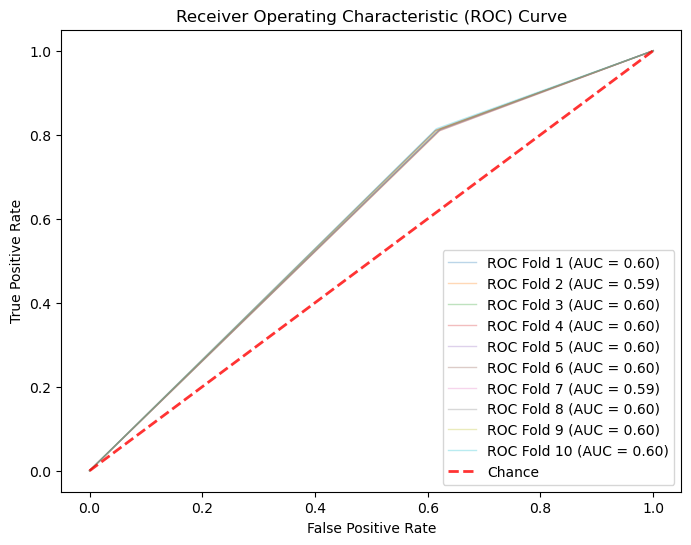

In [36]:
# Random forest K10
model = RandomForestClassifier(n_estimators=500, random_state=100)

# Define k-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=100)

# Initialize lists to store evaluation metrics
sensitivity_scores = []
specificity_scores = []
ppv_scores = []
npv_scores = []
f1_scores = []
accuracy_scores = []
mean_fpr = np.linspace(0, 1, 100)

# Initialize figure for ROC curve
plt.figure(figsize=(8, 6))

# Perform cross-validation
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # For classification, you don't need to round predicted values
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Calculate Sensitivity (True Positive Rate)
    sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    sensitivity_scores.append(sensitivity)
    
    # Calculate Specificity (True Negative Rate)
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    specificity_scores.append(specificity)
    
    # Calculate Positive Predictive Value (Precision)
    ppv = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    ppv_scores.append(ppv)
    
    # Calculate Negative Predictive Value
    npv = cm[0, 0] / (cm[0, 0] + cm[1, 0])
    npv_scores.append(npv)
    
    # Calculate F1-score
    f1 = 2 * (ppv * sensitivity) / (ppv + sensitivity)
    f1_scores.append(f1)
    
    # Calculate Accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label=f'ROC Fold {i+1} (AUC = {roc_auc:.2f})')

# Compute average scores across all folds
avg_sensitivity = sum(sensitivity_scores) / len(sensitivity_scores)
avg_specificity = sum(specificity_scores) / len(specificity_scores)
avg_ppv = sum(ppv_scores) / len(ppv_scores)
avg_npv = sum(npv_scores) / len(npv_scores)
avg_f1 = sum(f1_scores) / len(f1_scores)
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)

# Print average evaluation metrics
print("\nAverage Sensitivity (SE):", avg_sensitivity)
print("Average Specificity (SP):", avg_specificity)
print("Average Positive Predictive Value (PPV):", avg_ppv)
print("Average Negative Predictive Value (NPV):", avg_npv)
print("Average F1-score (FM):", avg_f1)
#print("Average Accuracy Score:", avg_accuracy)

# Plot ROC curve
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=0.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Decision Tree


Average Sensitivity (SE): 0.7962842215399941
Average Specificity (SP): 0.3962534388088962
Average Positive Predictive Value (PPV): 0.6648323891434249
Average Negative Predictive Value (NPV): 0.564034002246985
Average F1-score (FM): 0.7246314033958425


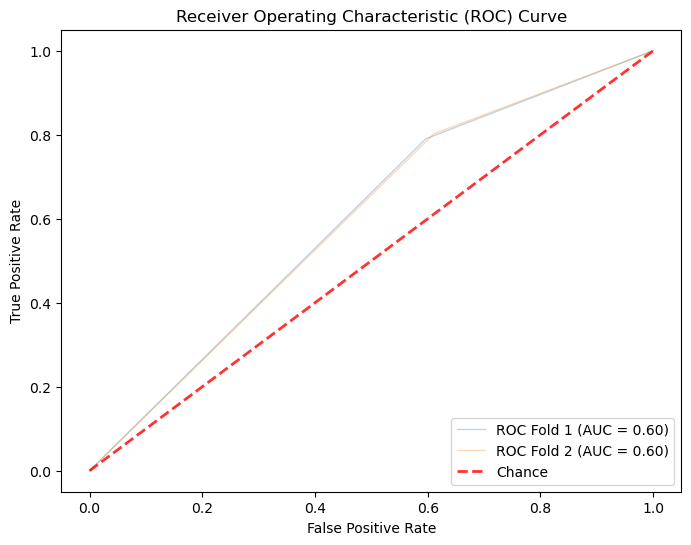

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Decision tree K2
model = DecisionTreeClassifier(random_state=100)

# Define k-fold cross-validation
kfold = KFold(n_splits=2, shuffle=True, random_state=100)

# Initialize lists to store evaluation metrics
sensitivity_scores = []
specificity_scores = []
ppv_scores = []
npv_scores = []
f1_scores = []
accuracy_scores = []
mean_fpr = np.linspace(0, 1, 100)

# Initialize figure for ROC curve
plt.figure(figsize=(8, 6))

# Perform cross-validation
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # For classification, you don't need to round predicted values
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Calculate Sensitivity (True Positive Rate)
    sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    sensitivity_scores.append(sensitivity)
    
    # Calculate Specificity (True Negative Rate)
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    specificity_scores.append(specificity)
    
    # Calculate Positive Predictive Value (Precision)
    ppv = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    ppv_scores.append(ppv)
    
    # Calculate Negative Predictive Value
    npv = cm[0, 0] / (cm[0, 0] + cm[1, 0])
    npv_scores.append(npv)
    
    # Calculate F1-score
    f1 = 2 * (ppv * sensitivity) / (ppv + sensitivity)
    f1_scores.append(f1)
    
    # Calculate Accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label=f'ROC Fold {i+1} (AUC = {roc_auc:.2f})')

# Compute average scores across all folds
avg_sensitivity = sum(sensitivity_scores) / len(sensitivity_scores)
avg_specificity = sum(specificity_scores) / len(specificity_scores)
avg_ppv = sum(ppv_scores) / len(ppv_scores)
avg_npv = sum(npv_scores) / len(npv_scores)
avg_f1 = sum(f1_scores) / len(f1_scores)
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)

# Print average evaluation metrics
print("\nAverage Sensitivity (SE):", avg_sensitivity)
print("Average Specificity (SP):", avg_specificity)
print("Average Positive Predictive Value (PPV):", avg_ppv)
print("Average Negative Predictive Value (NPV):", avg_npv)
print("Average F1-score (FM):", avg_f1)
#print("Average Accuracy Score:", avg_accuracy)

# Plot ROC curve
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=0.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



Average Sensitivity (SE): 0.803881904484928
Average Specificity (SP): 0.38861359260052397
Average Positive Predictive Value (PPV): 0.6641379506785839
Average Negative Predictive Value (NPV): 0.5685220337250023
Average F1-score (FM): 0.7273557990841294


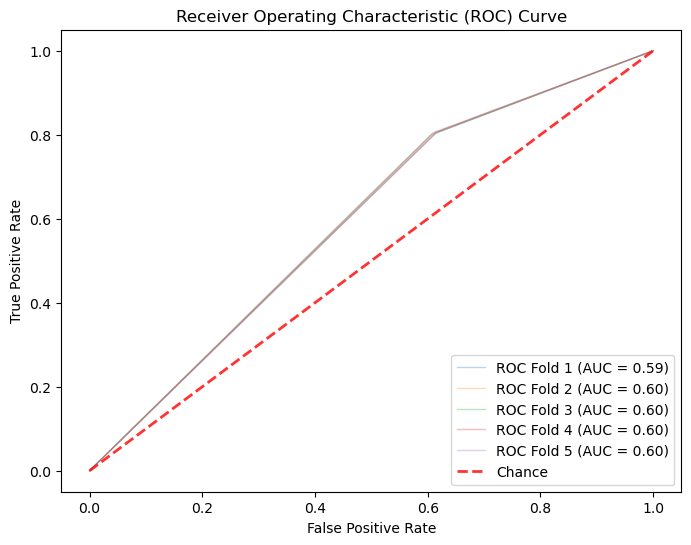

In [38]:
# Decision tree K5
model = DecisionTreeClassifier(random_state=100)

# Define k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=100)

# Initialize lists to store evaluation metrics
sensitivity_scores = []
specificity_scores = []
ppv_scores = []
npv_scores = []
f1_scores = []
accuracy_scores = []
mean_fpr = np.linspace(0, 1, 100)

# Initialize figure for ROC curve
plt.figure(figsize=(8, 6))

# Perform cross-validation
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # For classification, you don't need to round predicted values
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Calculate Sensitivity (True Positive Rate)
    sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    sensitivity_scores.append(sensitivity)
    
    # Calculate Specificity (True Negative Rate)
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    specificity_scores.append(specificity)
    
    # Calculate Positive Predictive Value (Precision)
    ppv = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    ppv_scores.append(ppv)
    
    # Calculate Negative Predictive Value
    npv = cm[0, 0] / (cm[0, 0] + cm[1, 0])
    npv_scores.append(npv)
    
    # Calculate F1-score
    f1 = 2 * (ppv * sensitivity) / (ppv + sensitivity)
    f1_scores.append(f1)
    
    # Calculate Accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label=f'ROC Fold {i+1} (AUC = {roc_auc:.2f})')

# Compute average scores across all folds
avg_sensitivity = sum(sensitivity_scores) / len(sensitivity_scores)
avg_specificity = sum(specificity_scores) / len(specificity_scores)
avg_ppv = sum(ppv_scores) / len(ppv_scores)
avg_npv = sum(npv_scores) / len(npv_scores)
avg_f1 = sum(f1_scores) / len(f1_scores)
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)

# Print average evaluation metrics
print("\nAverage Sensitivity (SE):", avg_sensitivity)
print("Average Specificity (SP):", avg_specificity)
print("Average Positive Predictive Value (PPV):", avg_ppv)
print("Average Negative Predictive Value (NPV):", avg_npv)
print("Average F1-score (FM):", avg_f1)
#print("Average Accuracy Score:", avg_accuracy)

# Plot ROC curve
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=0.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



Average Sensitivity (SE): 0.8043335102863356
Average Specificity (SP): 0.38908335572530295
Average Positive Predictive Value (PPV): 0.6644342903996275
Average Negative Predictive Value (NPV): 0.5693784947023363
Average F1-score (FM): 0.7277176084220207


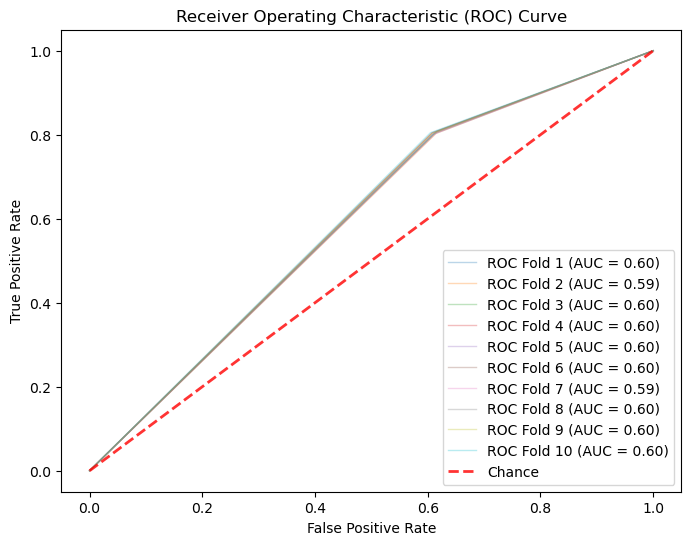

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Decision tree K10
model = DecisionTreeClassifier(random_state=100)

# Define k-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=100)

# Initialize lists to store evaluation metrics
sensitivity_scores = []
specificity_scores = []
ppv_scores = []
npv_scores = []
f1_scores = []
accuracy_scores = []
mean_fpr = np.linspace(0, 1, 100)

# Initialize figure for ROC curve
plt.figure(figsize=(8, 6))

# Perform cross-validation
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # For classification, you don't need to round predicted values
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Calculate Sensitivity (True Positive Rate)
    sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    sensitivity_scores.append(sensitivity)
    
    # Calculate Specificity (True Negative Rate)
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    specificity_scores.append(specificity)
    
    # Calculate Positive Predictive Value (Precision)
    ppv = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    ppv_scores.append(ppv)
    
    # Calculate Negative Predictive Value
    npv = cm[0, 0] / (cm[0, 0] + cm[1, 0])
    npv_scores.append(npv)
    
    # Calculate F1-score
    f1 = 2 * (ppv * sensitivity) / (ppv + sensitivity)
    f1_scores.append(f1)
    
    # Calculate Accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label=f'ROC Fold {i+1} (AUC = {roc_auc:.2f})')

# Compute average scores across all folds
avg_sensitivity = sum(sensitivity_scores) / len(sensitivity_scores)
avg_specificity = sum(specificity_scores) / len(specificity_scores)
avg_ppv = sum(ppv_scores) / len(ppv_scores)
avg_npv = sum(npv_scores) / len(npv_scores)
avg_f1 = sum(f1_scores) / len(f1_scores)
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)

# Print average evaluation metrics
print("\nAverage Sensitivity (SE):", avg_sensitivity)
print("Average Specificity (SP):", avg_specificity)
print("Average Positive Predictive Value (PPV):", avg_ppv)
print("Average Negative Predictive Value (NPV):", avg_npv)
print("Average F1-score (FM):", avg_f1)
#print("Average Accuracy Score:", avg_accuracy)

# Plot ROC curve
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=0.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


MLP


Average Sensitivity (SE): 0.8134276398828213
Average Specificity (SP): 0.3864329728707196
Average Positive Predictive Value (PPV): 0.6660163171866866
Average Negative Predictive Value (NPV): 0.5796311696547707
Average F1-score (FM): 0.732322366927046


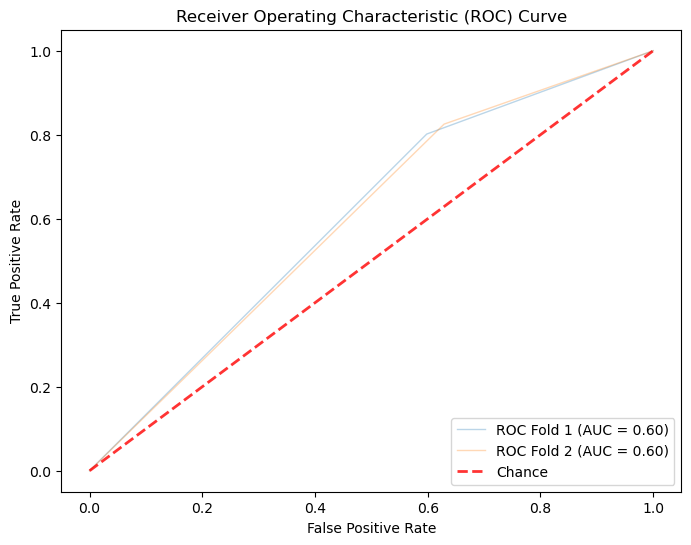

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

# MLP classifier K2
model = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=1000, random_state=100)

# Define k-fold cross-validation
kfold = KFold(n_splits=2, shuffle=True, random_state=100)

# Initialize lists to store evaluation metrics
sensitivity_scores = []
specificity_scores = []
ppv_scores = []
npv_scores = []
f1_scores = []
accuracy_scores = []
mean_fpr = np.linspace(0, 1, 100)

# Initialize figure for ROC curve
plt.figure(figsize=(8, 6))

# Perform cross-validation
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # For classification, you don't need to round predicted values
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Calculate Sensitivity (True Positive Rate)
    sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    sensitivity_scores.append(sensitivity)
    
    # Calculate Specificity (True Negative Rate)
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    specificity_scores.append(specificity)
    
    # Calculate Positive Predictive Value (Precision)
    ppv = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    ppv_scores.append(ppv)
    
    # Calculate Negative Predictive Value
    npv = cm[0, 0] / (cm[0, 0] + cm[1, 0])
    npv_scores.append(npv)
    
    # Calculate F1-score
    f1 = 2 * (ppv * sensitivity) / (ppv + sensitivity)
    f1_scores.append(f1)
    
    # Calculate Accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label=f'ROC Fold {i+1} (AUC = {roc_auc:.2f})')

# Compute average scores across all folds
avg_sensitivity = sum(sensitivity_scores) / len(sensitivity_scores)
avg_specificity = sum(specificity_scores) / len(specificity_scores)
avg_ppv = sum(ppv_scores) / len(ppv_scores)
avg_npv = sum(npv_scores) / len(npv_scores)
avg_f1 = sum(f1_scores) / len(f1_scores)
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)

# Print average evaluation metrics
print("\nAverage Sensitivity (SE):", avg_sensitivity)
print("Average Specificity (SP):", avg_specificity)
print("Average Positive Predictive Value (PPV):", avg_ppv)
print("Average Negative Predictive Value (NPV):", avg_npv)
print("Average F1-score (FM):", avg_f1)
#print("Average Accuracy Score:", avg_accuracy)

# Plot ROC curve
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=0.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



Average Sensitivity (SE): 0.8217732796153865
Average Specificity (SP): 0.3757839024012107
Average Positive Predictive Value (PPV): 0.6644428241625668
Average Negative Predictive Value (NPV): 0.5837687659140578
Average F1-score (FM): 0.7347559183274557


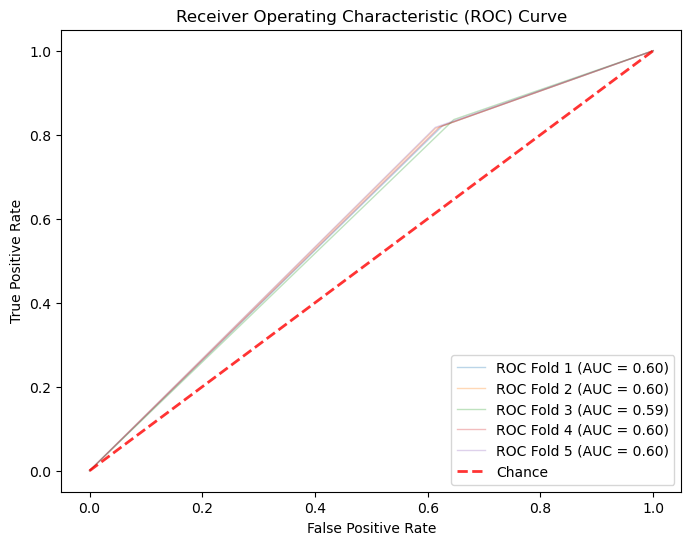

In [41]:
# MLP classifier k5
model = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=1000, random_state=100)

# Define k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=100)

# Initialize lists to store evaluation metrics
sensitivity_scores = []
specificity_scores = []
ppv_scores = []
npv_scores = []
f1_scores = []
accuracy_scores = []
mean_fpr = np.linspace(0, 1, 100)

# Initialize figure for ROC curve
plt.figure(figsize=(8, 6))

# Perform cross-validation
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # For classification, you don't need to round predicted values
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Calculate Sensitivity (True Positive Rate)
    sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    sensitivity_scores.append(sensitivity)
    
    # Calculate Specificity (True Negative Rate)
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    specificity_scores.append(specificity)
    
    # Calculate Positive Predictive Value (Precision)
    ppv = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    ppv_scores.append(ppv)
    
    # Calculate Negative Predictive Value
    npv = cm[0, 0] / (cm[0, 0] + cm[1, 0])
    npv_scores.append(npv)
    
    # Calculate F1-score
    f1 = 2 * (ppv * sensitivity) / (ppv + sensitivity)
    f1_scores.append(f1)
    
    # Calculate Accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label=f'ROC Fold {i+1} (AUC = {roc_auc:.2f})')

# Compute average scores across all folds
avg_sensitivity = sum(sensitivity_scores) / len(sensitivity_scores)
avg_specificity = sum(specificity_scores) / len(specificity_scores)
avg_ppv = sum(ppv_scores) / len(ppv_scores)
avg_npv = sum(npv_scores) / len(npv_scores)
avg_f1 = sum(f1_scores) / len(f1_scores)
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)

# Print average evaluation metrics
print("\nAverage Sensitivity (SE):", avg_sensitivity)
print("Average Specificity (SP):", avg_specificity)
print("Average Positive Predictive Value (PPV):", avg_ppv)
print("Average Negative Predictive Value (NPV):", avg_npv)
print("Average F1-score (FM):", avg_f1)
#print("Average Accuracy Score:", avg_accuracy)

# Plot ROC curve
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=0.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



Average Sensitivity (SE): 0.8261414249674944
Average Specificity (SP): 0.3695428181583007
Average Positive Predictive Value (PPV): 0.6634446384708634
Average Negative Predictive Value (NPV): 0.58598658727199
Average F1-score (FM): 0.735820962668441


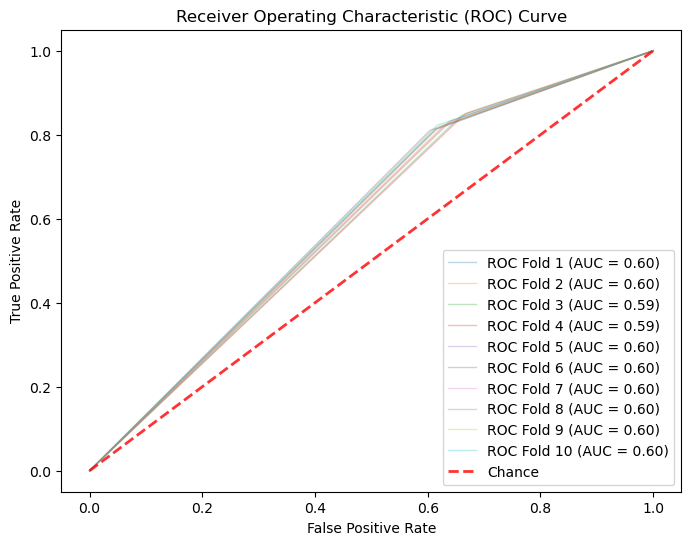

In [42]:
# MLP classifier k10
model = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=1000, random_state=100)

# Define k-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=100)

# Initialize lists to store evaluation metrics
sensitivity_scores = []
specificity_scores = []
ppv_scores = []
npv_scores = []
f1_scores = []
accuracy_scores = []
mean_fpr = np.linspace(0, 1, 100)

# Initialize figure for ROC curve
plt.figure(figsize=(8, 6))

# Perform cross-validation
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # For classification, you don't need to round predicted values
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Calculate Sensitivity (True Positive Rate)
    sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    sensitivity_scores.append(sensitivity)
    
    # Calculate Specificity (True Negative Rate)
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    specificity_scores.append(specificity)
    
    # Calculate Positive Predictive Value (Precision)
    ppv = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    ppv_scores.append(ppv)
    
    # Calculate Negative Predictive Value
    npv = cm[0, 0] / (cm[0, 0] + cm[1, 0])
    npv_scores.append(npv)
    
    # Calculate F1-score
    f1 = 2 * (ppv * sensitivity) / (ppv + sensitivity)
    f1_scores.append(f1)
    
    # Calculate Accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label=f'ROC Fold {i+1} (AUC = {roc_auc:.2f})')

# Compute average scores across all folds
avg_sensitivity = sum(sensitivity_scores) / len(sensitivity_scores)
avg_specificity = sum(specificity_scores) / len(specificity_scores)
avg_ppv = sum(ppv_scores) / len(ppv_scores)
avg_npv = sum(npv_scores) / len(npv_scores)
avg_f1 = sum(f1_scores) / len(f1_scores)
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)

# Print average evaluation metrics
print("\nAverage Sensitivity (SE):", avg_sensitivity)
print("Average Specificity (SP):", avg_specificity)
print("Average Positive Predictive Value (PPV):", avg_ppv)
print("Average Negative Predictive Value (NPV):", avg_npv)
print("Average F1-score (FM):", avg_f1)
#print("Average Accuracy Score:", avg_accuracy)

# Plot ROC curve
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=0.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


KNN


Average Sensitivity (SE): 0.0895818376334538
Average Specificity (SP): 0.9519640742397569
Average Positive Predictive Value (PPV): 0.286878454731689
Average Negative Predictive Value (NPV): 0.8280572783770352
Average F1-score (FM): 0.1363750596855268
Average Accuracy Score: 0.7981176794980479


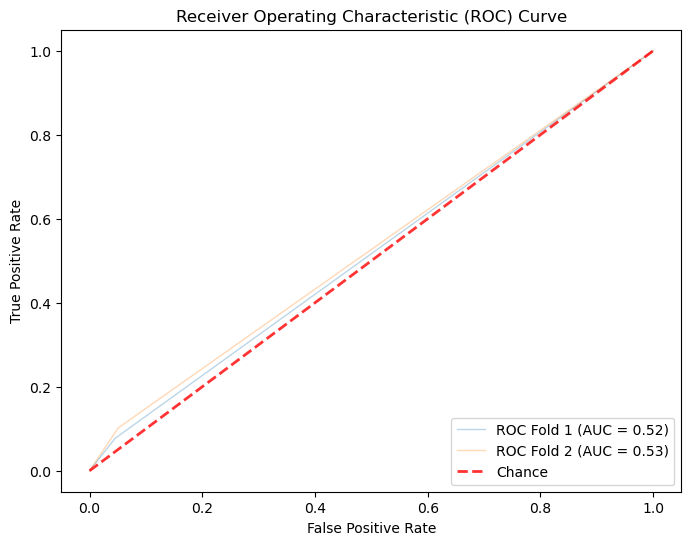

In [94]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# KNN classifier k2
model = KNeighborsClassifier()

# Define k-fold cross-validation
kfold = KFold(n_splits=2, shuffle=True, random_state=100)

# Initialize lists to store evaluation metrics
sensitivity_scores = []
specificity_scores = []
ppv_scores = []
npv_scores = []
f1_scores = []
accuracy_scores = []
mean_fpr = np.linspace(0, 1, 100)

# Initialize figure for ROC curve
plt.figure(figsize=(8, 6))

# Perform cross-validation
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # For classification, you don't need to round predicted values
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Calculate Sensitivity (True Positive Rate)
    sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    sensitivity_scores.append(sensitivity)
    
    # Calculate Specificity (True Negative Rate)
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    specificity_scores.append(specificity)
    
    # Calculate Positive Predictive Value (Precision)
    ppv = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    ppv_scores.append(ppv)
    
    # Calculate Negative Predictive Value
    npv = cm[0, 0] / (cm[0, 0] + cm[1, 0])
    npv_scores.append(npv)
    
    # Calculate F1-score
    f1 = 2 * (ppv * sensitivity) / (ppv + sensitivity)
    f1_scores.append(f1)
    
    # Calculate Accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label=f'ROC Fold {i+1} (AUC = {roc_auc:.2f})')

# Compute average scores across all folds
avg_sensitivity = sum(sensitivity_scores) / len(sensitivity_scores)
avg_specificity = sum(specificity_scores) / len(specificity_scores)
avg_ppv = sum(ppv_scores) / len(ppv_scores)
avg_npv = sum(npv_scores) / len(npv_scores)
avg_f1 = sum(f1_scores) / len(f1_scores)
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)

# Print average evaluation metrics
print("\nAverage Sensitivity (SE):", avg_sensitivity)
print("Average Specificity (SP):", avg_specificity)
print("Average Positive Predictive Value (PPV):", avg_ppv)
print("Average Negative Predictive Value (NPV):", avg_npv)
print("Average F1-score (FM):", avg_f1)
#print("Average Accuracy Score:", avg_accuracy)

# Plot ROC curve
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=0.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



Average Sensitivity (SE): 0.7074847530272232
Average Specificity (SP): 0.4076508112596334
Average Positive Predictive Value (PPV): 0.6424639274139261
Average Negative Predictive Value (NPV): 0.4816031411138721
Average F1-score (FM): 0.6730603220023914


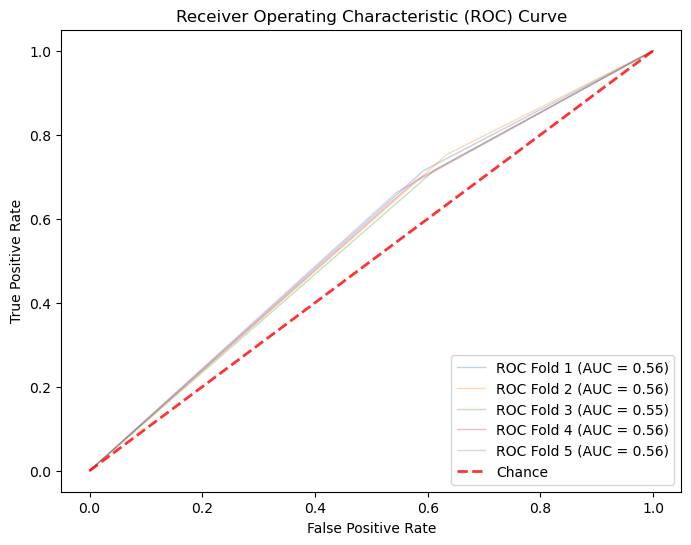

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# KNN classifier k5
model = KNeighborsClassifier()

# Define k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=100)

# Initialize lists to store evaluation metrics
sensitivity_scores = []
specificity_scores = []
ppv_scores = []
npv_scores = []
f1_scores = []
accuracy_scores = []
mean_fpr = np.linspace(0, 1, 100)

# Initialize figure for ROC curve
plt.figure(figsize=(8, 6))

# Perform cross-validation
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # For classification, you don't need to round predicted values
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Calculate Sensitivity (True Positive Rate)
    sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    sensitivity_scores.append(sensitivity)
    
    # Calculate Specificity (True Negative Rate)
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    specificity_scores.append(specificity)
    
    # Calculate Positive Predictive Value (Precision)
    ppv = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    ppv_scores.append(ppv)
    
    # Calculate Negative Predictive Value
    npv = cm[0, 0] / (cm[0, 0] + cm[1, 0])
    npv_scores.append(npv)
    
    # Calculate F1-score
    f1 = 2 * (ppv * sensitivity) / (ppv + sensitivity)
    f1_scores.append(f1)
    
    # Calculate Accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label=f'ROC Fold {i+1} (AUC = {roc_auc:.2f})')

# Compute average scores across all folds
avg_sensitivity = sum(sensitivity_scores) / len(sensitivity_scores)
avg_specificity = sum(specificity_scores) / len(specificity_scores)
avg_ppv = sum(ppv_scores) / len(ppv_scores)
avg_npv = sum(npv_scores) / len(npv_scores)
avg_f1 = sum(f1_scores) / len(f1_scores)
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)

# Print average evaluation metrics
print("\nAverage Sensitivity (SE):", avg_sensitivity)
print("Average Specificity (SP):", avg_specificity)
print("Average Positive Predictive Value (PPV):", avg_ppv)
print("Average Negative Predictive Value (NPV):", avg_npv)
print("Average F1-score (FM):", avg_f1)
#print("Average Accuracy Score:", avg_accuracy)

# Plot ROC curve
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=0.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



Average Sensitivity (SE): 0.7030932132489804
Average Specificity (SP): 0.4065668439111646
Average Positive Predictive Value (PPV): 0.6405632124678501
Average Negative Predictive Value (NPV): 0.4770035928462515
Average F1-score (FM): 0.6701530164303711


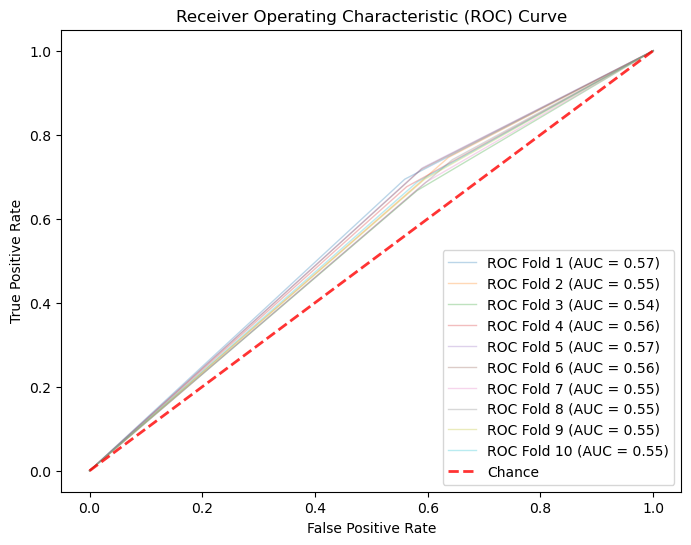

In [43]:
# KNN classifier k10
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

model = KNeighborsClassifier()

# Define k-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=100)

# Initialize lists to store evaluation metrics
sensitivity_scores = []
specificity_scores = []
ppv_scores = []
npv_scores = []
f1_scores = []
accuracy_scores = []
mean_fpr = np.linspace(0, 1, 100)

# Initialize figure for ROC curve
plt.figure(figsize=(8, 6))

# Perform cross-validation
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # For classification, you don't need to round predicted values
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Calculate Sensitivity (True Positive Rate)
    sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    sensitivity_scores.append(sensitivity)
    
    # Calculate Specificity (True Negative Rate)
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    specificity_scores.append(specificity)
    
    # Calculate Positive Predictive Value (Precision)
    ppv = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    ppv_scores.append(ppv)
    
    # Calculate Negative Predictive Value
    npv = cm[0, 0] / (cm[0, 0] + cm[1, 0])
    npv_scores.append(npv)
    
    # Calculate F1-score
    f1 = 2 * (ppv * sensitivity) / (ppv + sensitivity)
    f1_scores.append(f1)
    
    # Calculate Accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label=f'ROC Fold {i+1} (AUC = {roc_auc:.2f})')

# Compute average scores across all folds
avg_sensitivity = sum(sensitivity_scores) / len(sensitivity_scores)
avg_specificity = sum(specificity_scores) / len(specificity_scores)
avg_ppv = sum(ppv_scores) / len(ppv_scores)
avg_npv = sum(npv_scores) / len(npv_scores)
avg_f1 = sum(f1_scores) / len(f1_scores)
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)

# Print average evaluation metrics
print("\nAverage Sensitivity (SE):", avg_sensitivity)
print("Average Specificity (SP):", avg_specificity)
print("Average Positive Predictive Value (PPV):", avg_ppv)
print("Average Negative Predictive Value (NPV):", avg_npv)
print("Average F1-score (FM):", avg_f1)
#print("Average Accuracy Score:", avg_accuracy)

# Plot ROC curve
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=0.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


ANN

8523/8523 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step
8523/8523 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step
Mean F1 Score: 0.7308748264173244
Mean Sensitivity (True Positive Rate): 0.8069104917678571
Mean Specificity (True Negative Rate): 0.39632339758156343
Mean Positive Predictive Value (Precision): 0.66822862551926
Mean Negative Predictive Value: 0.5775068418127562


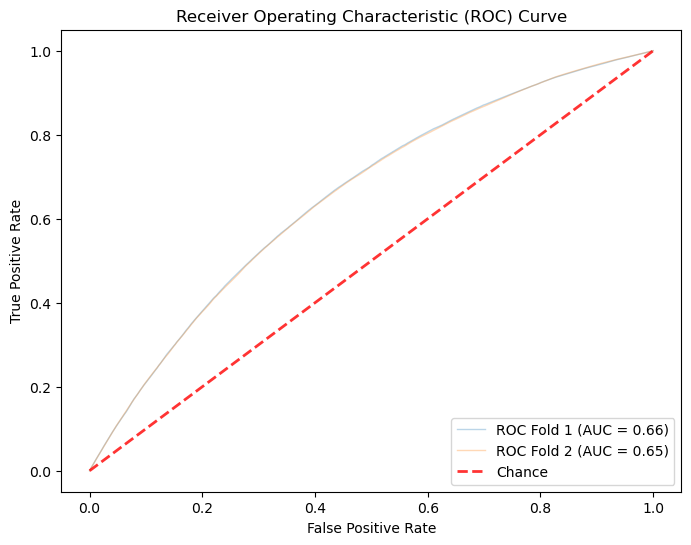

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc, f1_score
from sklearn.model_selection import KFold
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# ANN K2
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

# Split the data into K folds
kf = KFold(n_splits=2, shuffle=True)

# Initialize lists to store evaluation metrics
accuracies = []
f1_scores = []
sensitivity_scores = []
specificity_scores = []
ppv_scores = []
npv_scores = []
mean_fpr = np.linspace(0, 1, 100)

# Initialize figure for ROC curve
plt.figure(figsize=(8, 6))

# Iterate through each fold

for i, (train_index, test_index) in enumerate(kf.split(X_train)):
    # Split data into train and test sets for this fold
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # Define the model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, validation_data=(X_test_fold, y_test_fold), verbose=0)

    # Evaluate the model
    y_pred_fold = model.predict(X_test_fold)

    # Calculate evaluation metrics for this fold
    accuracy_fold = accuracy_score(y_test_fold, (y_pred_fold > 0.5).astype(int))
    f1_fold = f1_score(y_test_fold, (y_pred_fold > 0.5).astype(int))
    cm = confusion_matrix(y_test_fold, (y_pred_fold > 0.5).astype(int))
    sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    ppv = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    npv = cm[0, 0] / (cm[0, 0] + cm[1, 0])

    # Append evaluation metrics to lists
    accuracies.append(accuracy_fold)
    f1_scores.append(f1_fold)
    sensitivity_scores.append(sensitivity)
    specificity_scores.append(specificity)
    ppv_scores.append(ppv)
    npv_scores.append(npv)

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test_fold, y_pred_fold)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label=f'ROC Fold {i+1} (AUC = {roc_auc:.2f})')

# Calculate mean and standard deviation of evaluation metrics
mean_f1 = np.mean(f1_scores)

mean_sensitivity = np.mean(sensitivity_scores)
mean_specificity = np.mean(specificity_scores)
mean_ppv = np.mean(ppv_scores)
mean_npv = np.mean(npv_scores)

# Print evaluation metrics
print("Mean F1 Score:", mean_f1)

print("Mean Sensitivity (True Positive Rate):", mean_sensitivity)
print("Mean Specificity (True Negative Rate):", mean_specificity)
print("Mean Positive Predictive Value (Precision):", mean_ppv)
print("Mean Negative Predictive Value:", mean_npv)

# Plot ROC curve
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=0.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


3410/3410 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
3410/3410 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
3410/3410 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
3410/3410 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
3410/3410 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
Mean F1 Score: 0.7318080140676868
Mean Sensitivity (True Positive Rate): 0.8113448268781699
Mean Specificity (True Negative Rate): 0.3895962544554469
Mean Positive Predictive Value (Precision): 0.6672001646753565
Mean Negative Predictive Value: 0.5796877753348066


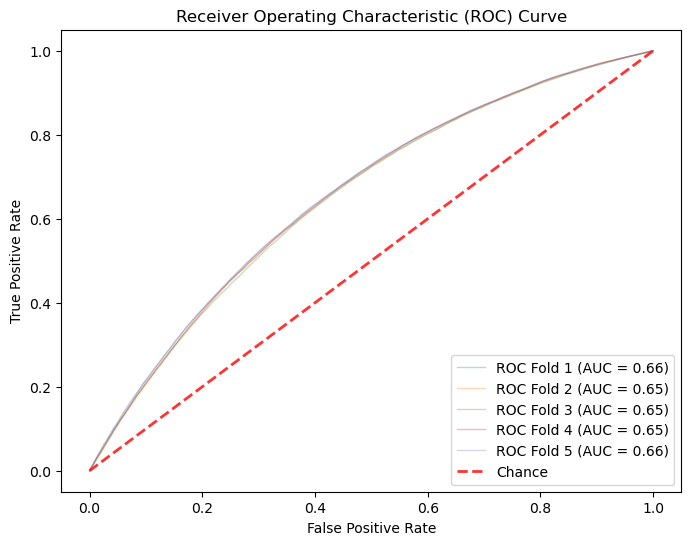

In [32]:
# ANN K5
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

# Split the data into K folds
kf = KFold(n_splits=5, shuffle=True)

# Initialize lists to store evaluation metrics
accuracies = []
f1_scores = []
sensitivity_scores = []
specificity_scores = []
ppv_scores = []
npv_scores = []
mean_fpr = np.linspace(0, 1, 100)

# Initialize figure for ROC curve
plt.figure(figsize=(8, 6))

# Iterate through each fold
for i, (train_index, test_index) in enumerate(kf.split(X_train)):
    # Split data into train and test sets for this fold
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # Define the model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, validation_data=(X_test_fold, y_test_fold), verbose=0)

    # Evaluate the model
    y_pred_fold = model.predict(X_test_fold)

    # Calculate evaluation metrics for this fold
    accuracy_fold = accuracy_score(y_test_fold, (y_pred_fold > 0.5).astype(int))
    f1_fold = f1_score(y_test_fold, (y_pred_fold > 0.5).astype(int))
    cm = confusion_matrix(y_test_fold, (y_pred_fold > 0.5).astype(int))
    sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    ppv = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    npv = cm[0, 0] / (cm[0, 0] + cm[1, 0])

    # Append evaluation metrics to lists
    accuracies.append(accuracy_fold)
    f1_scores.append(f1_fold)
    sensitivity_scores.append(sensitivity)
    specificity_scores.append(specificity)
    ppv_scores.append(ppv)
    npv_scores.append(npv)

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test_fold, y_pred_fold)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label=f'ROC Fold {i+1} (AUC = {roc_auc:.2f})')

# Calculate mean and standard deviation of evaluation metrics
mean_f1 = np.mean(f1_scores)

mean_sensitivity = np.mean(sensitivity_scores)
mean_specificity = np.mean(specificity_scores)
mean_ppv = np.mean(ppv_scores)
mean_npv = np.mean(npv_scores)

# Print evaluation metrics
print("Mean F1 Score:", mean_f1)

print("Mean Sensitivity (True Positive Rate):", mean_sensitivity)
print("Mean Specificity (True Negative Rate):", mean_specificity)
print("Mean Positive Predictive Value (Precision):", mean_ppv)
print("Mean Negative Predictive Value:", mean_npv)

# Plot ROC curve
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=0.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


1705/1705 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
1705/1705 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1705/1705 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1705/1705 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1705/1705 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1705/1705 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
1705/1705 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1705/1705 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1705/1705 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1705/1705 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Mean F1 Score: 0.7348674900853066
Mean Sensitivity (True Positive Rate): 0.8220219188258303
Mean Specificity (True Negative Rate): 0.37506396455874086
Mean Positive Predictive Value (Precision): 0.6646533651920966
Mean Negative Predictive Value: 0.5837619508320723


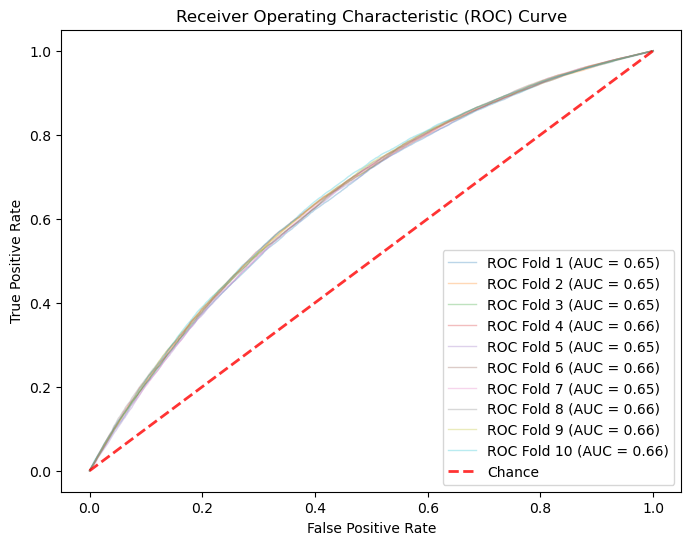

In [33]:
# ANN K10
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

# Split the data into K folds
kf = KFold(n_splits=10, shuffle=True)

# Initialize lists to store evaluation metrics
accuracies = []
f1_scores = []
sensitivity_scores = []
specificity_scores = []
ppv_scores = []
npv_scores = []
mean_fpr = np.linspace(0, 1, 100)

# Initialize figure for ROC curve
plt.figure(figsize=(8, 6))

# Iterate through each fold
for i, (train_index, test_index) in enumerate(kf.split(X_train)):
    # Split data into train and test sets for this fold
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # Define the model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, validation_data=(X_test_fold, y_test_fold), verbose=0)

    # Evaluate the model
    y_pred_fold = model.predict(X_test_fold)

    # Calculate evaluation metrics for this fold
    accuracy_fold = accuracy_score(y_test_fold, (y_pred_fold > 0.5).astype(int))
    f1_fold = f1_score(y_test_fold, (y_pred_fold > 0.5).astype(int))
    cm = confusion_matrix(y_test_fold, (y_pred_fold > 0.5).astype(int))
    sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    ppv = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    npv = cm[0, 0] / (cm[0, 0] + cm[1, 0])

    # Append evaluation metrics to lists
    accuracies.append(accuracy_fold)
    f1_scores.append(f1_fold)
    sensitivity_scores.append(sensitivity)
    specificity_scores.append(specificity)
    ppv_scores.append(ppv)
    npv_scores.append(npv)

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test_fold, y_pred_fold)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label=f'ROC Fold {i+1} (AUC = {roc_auc:.2f})')

# Calculate mean and standard deviation of evaluation metrics
mean_f1 = np.mean(f1_scores)
mean_sensitivity = np.mean(sensitivity_scores)
mean_specificity = np.mean(specificity_scores)
mean_ppv = np.mean(ppv_scores)
mean_npv = np.mean(npv_scores)

# Print evaluation metrics
print("Mean F1 Score:", mean_f1)

print("Mean Sensitivity (True Positive Rate):", mean_sensitivity)
print("Mean Specificity (True Negative Rate):", mean_specificity)
print("Mean Positive Predictive Value (Precision):", mean_ppv)
print("Mean Negative Predictive Value:", mean_npv)

# Plot ROC curve
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=0.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Naive Bayes


Sensitivity (True Positive Rate): 0.09401853411962932
Specificity (True Negative Rate): 0.9545653187809169
Positive Predictive Value (Precision): 0.7568109446868735
Negative Predictive Value: 0.41197158543388956
F1-score: 0.1672585574372976


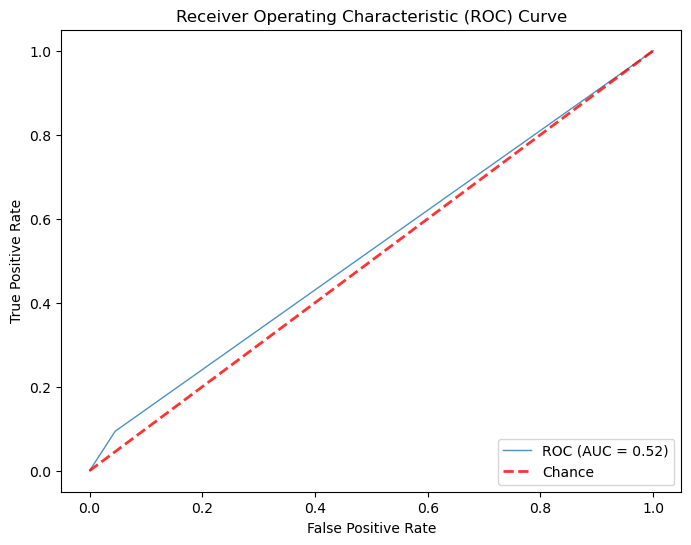

In [44]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Initialize Naive Bayes model
model = GaussianNB()

# Fit the model to the entire dataset
model.fit(X, y)

# Predict on the entire dataset
y_pred = model.predict(X)

# Compute confusion matrix
cm = confusion_matrix(y, y_pred)

# Calculate Sensitivity (True Positive Rate)
sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])

# Calculate Specificity (True Negative Rate)
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

# Calculate Positive Predictive Value (Precision)
ppv = cm[1, 1] / (cm[1, 1] + cm[0, 1])

# Calculate Negative Predictive Value
npv = cm[0, 0] / (cm[0, 0] + cm[1, 0])

# Calculate F1-score
f1 = 2 * (ppv * sensitivity) / (ppv + sensitivity)

# Calculate Accuracy score
accuracy = accuracy_score(y, y_pred)

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y, y_pred)
roc_auc = auc(fpr, tpr)

# Print evaluation metrics
print("\nSensitivity (True Positive Rate):", sensitivity)
print("Specificity (True Negative Rate):", specificity)
print("Positive Predictive Value (Precision):", ppv)
print("Negative Predictive Value:", npv)
print("F1-score:", f1)
#print("Accuracy Score:", accuracy)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=1, alpha=0.8, label=f'ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=0.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from sklearn.svm import SVC

SVM = SVC(kernel='poly', degree=30, C=1)
SVM.fit(X_train,y_train)
predicted_values = SVM.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Random Forest

precision score 0.8221565340157063
recall score 0.9974664121184006
accuracy score 0.8205538118565017
f1 score 0.9013664395985327


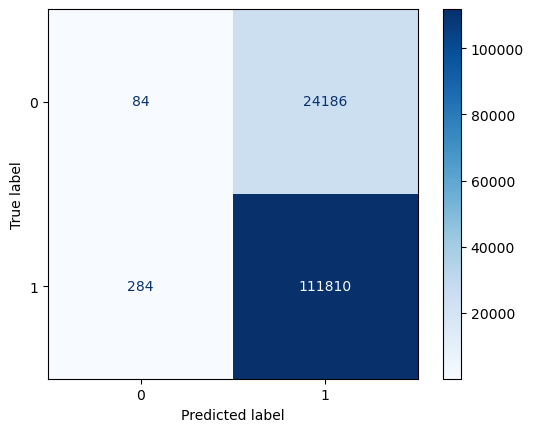

In [105]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have already defined X_train, X_test, y_train, and y_test

# Initialize and train the random forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate evaluation metrics
p = precision_score(y_test, y_pred)
r = recall_score(y_test, y_pred)
a = accuracy_score(y_test, y_pred)
f = f1_score(y_test, y_pred)

print("precision score", p)
print("recall score", r)
print("accuracy score", a)
print("f1 score", f)

# Plot confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred, labels=rf_classifier.classes_), display_labels=rf_classifier.classes_)
cmd.plot(cmap=plt.cm.Blues)  # Setting colormap to Blues for blue shades
plt.show()

Naive Bayes

precision score 0.8780401261164448
recall score 0.7726461719628169
accuracy score 0.7248907336247103
f1 score 0.8219785225854518


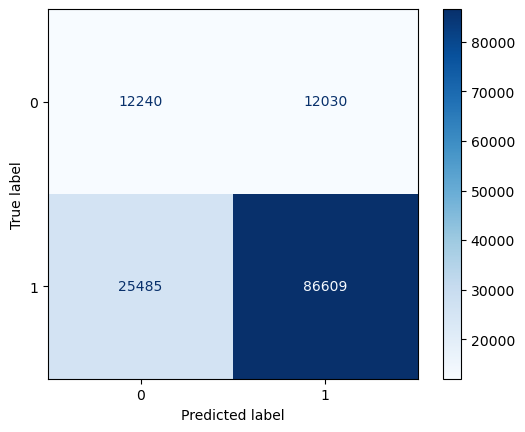

In [106]:
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have already defined X_train, X_test, y_train, and y_test

# Initialize and train the random forest classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = nb_classifier.predict(X_test)

# Calculate evaluation metrics
p = precision_score(y_test, y_pred)
r = recall_score(y_test, y_pred)
a = accuracy_score(y_test, y_pred)
f = f1_score(y_test, y_pred)

print("precision score", p)
print("recall score", r)
print("accuracy score", a)
print("f1 score", f)

# Plot confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred, labels=nb_classifier.classes_), display_labels=nb_classifier.classes_)
cmd.plot(cmap=plt.cm.Blues)  # Setting colormap to Blues for blue shades
plt.show()

Decision Tree

precision score 0.8221751922779126
recall score 0.9946651917140971
accuracy score 0.8187718166084891
f1 score 0.9002321309622333


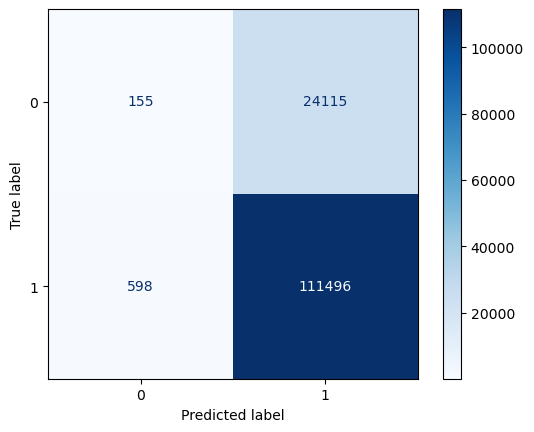

In [107]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have already defined X_train, X_test, y_train, and y_test

# Initialize and train the random forest classifier
dt_classifier = DecisionTreeClassifier(random_state=100)
dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate evaluation metrics
p = precision_score(y_test, y_pred)
r = recall_score(y_test, y_pred)
a = accuracy_score(y_test, y_pred)
f = f1_score(y_test, y_pred)

print("precision score", p)
print("recall score", r)
print("accuracy score", a)
print("f1 score", f)

# Plot confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred, labels=dt_classifier.classes_), display_labels=dt_classifier.classes_)
cmd.plot(cmap=plt.cm.Blues)  # Setting colormap to Blues for blue shades
plt.show()

MLP

precision score 0.8220204746120677
recall score 1.0
accuracy score 0.8220204746120677
f1 score 0.9023174943048725


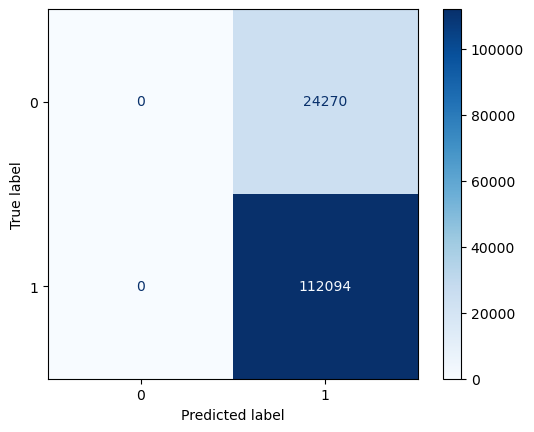

In [108]:
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have already defined X_train, X_test, y_train, and y_test

# Initialize and train the random forest classifier
mlp_classifier = MLPClassifier(random_state=100)
mlp_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = mlp_classifier.predict(X_test)

# Calculate evaluation metrics
p = precision_score(y_test, y_pred)
r = recall_score(y_test, y_pred)
a = accuracy_score(y_test, y_pred)
f = f1_score(y_test, y_pred)

print("precision score", p)
print("recall score", r)
print("accuracy score", a)
print("f1 score", f)

# Plot confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred, labels=mlp_classifier.classes_), display_labels=mlp_classifier.classes_)
cmd.plot(cmap=plt.cm.Blues)  # Setting colormap to Blues for blue shades
plt.show()

KNN

precision score 0.8307630667221834
recall score 0.9433778792798901
accuracy score 0.7954812120501012
f1 score 0.8834963217939452


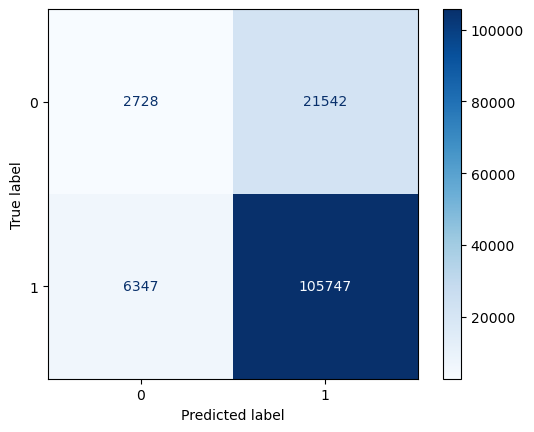

In [110]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have already defined X_train, X_test, y_train, and y_test

# Initialize and train the random forest classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_classifier.predict(X_test)

# Calculate evaluation metrics
p = precision_score(y_test, y_pred)
r = recall_score(y_test, y_pred)
a = accuracy_score(y_test, y_pred)
f = f1_score(y_test, y_pred)

print("precision score", p)
print("recall score", r)
print("accuracy score", a)
print("f1 score", f)

# Plot confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred, labels=knn_classifier.classes_), display_labels=knn_classifier.classes_)
cmd.plot(cmap=plt.cm.Blues)  # Setting colormap to Blues for blue shades
plt.show()

ANN

Epoch 1/20
17046/17046 ━━━━━━━━━━━━━━━━━━━━ 59s 3ms/step - accuracy: 0.8210 - loss: 0.4200 - val_accuracy: 0.8220 - val_loss: 0.4139
Epoch 2/20
17046/17046 ━━━━━━━━━━━━━━━━━━━━ 51s 3ms/step - accuracy: 0.8223 - loss: 0.4120 - val_accuracy: 0.8220 - val_loss: 0.4128
Epoch 3/20
17046/17046 ━━━━━━━━━━━━━━━━━━━━ 84s 3ms/step - accuracy: 0.8223 - loss: 0.4122 - val_accuracy: 0.8227 - val_loss: 0.4136
Epoch 4/20
17046/17046 ━━━━━━━━━━━━━━━━━━━━ 80s 3ms/step - accuracy: 0.8209 - loss: 0.4133 - val_accuracy: 0.8225 - val_loss: 0.4120
Epoch 5/20
17046/17046 ━━━━━━━━━━━━━━━━━━━━ 51s 3ms/step - accuracy: 0.8220 - loss: 0.4119 - val_accuracy: 0.8226 - val_loss: 0.4131
Epoch 6/20
17046/17046 ━━━━━━━━━━━━━━━━━━━━ 51s 3ms/step - accuracy: 0.8214 - loss: 0.4117 - val_accuracy: 0.8227 - val_loss: 0.4127
Epoch 7/20
17046/17046 ━━━━━━━━━━━━━━━━━━━━ 52s 3ms/step - accuracy: 0.8218 - loss: 0.4112 - val_accuracy: 0.8227 - val_loss: 0.4141
Epoch 8/20
17046/17046 ━━━━━━━━━━━━━━━━━━━━ 50s 3ms/step - accuracy: 

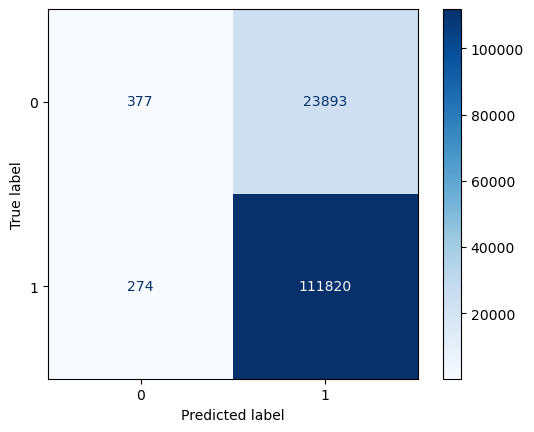

In [28]:
import tensorflow as tf
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Define the model
ann_model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
ann_model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
ann_model1.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = ann_model1.predict(X_test)
# Convert probabilities to binary labels
threshold = 0.5
y_pred = (y_pred > threshold).astype(int)

# Calculate evaluation metrics
p = precision_score(y_test, y_pred)
r = recall_score(y_test, y_pred)
a = accuracy_score(y_test, y_pred)
f = f1_score(y_test, y_pred)

print("precision score", p)
print("recall score", r)
print("accuracy score", a)
print("f1 score", f)

# Plot confusion matrix using ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=[0, 1])
cmd.plot(cmap=plt.cm.Blues)
plt.show()

Epoch 1/20
17046/17046 ━━━━━━━━━━━━━━━━━━━━ 83s 4ms/step - accuracy: 0.8216 - loss: 0.4292 - val_accuracy: 0.8220 - val_loss: 0.4283
Epoch 2/20
17046/17046 ━━━━━━━━━━━━━━━━━━━━ 68s 4ms/step - accuracy: 0.8207 - loss: 0.4266 - val_accuracy: 0.8220 - val_loss: 0.4258
Epoch 3/20
17046/17046 ━━━━━━━━━━━━━━━━━━━━ 61s 3ms/step - accuracy: 0.8208 - loss: 0.4259 - val_accuracy: 0.8220 - val_loss: 0.4260
Epoch 4/20
17046/17046 ━━━━━━━━━━━━━━━━━━━━ 44s 3ms/step - accuracy: 0.8215 - loss: 0.4248 - val_accuracy: 0.8220 - val_loss: 0.4259
Epoch 5/20
17046/17046 ━━━━━━━━━━━━━━━━━━━━ 74s 2ms/step - accuracy: 0.8218 - loss: 0.4248 - val_accuracy: 0.8220 - val_loss: 0.4258
Epoch 6/20
17046/17046 ━━━━━━━━━━━━━━━━━━━━ 47s 3ms/step - accuracy: 0.8218 - loss: 0.4244 - val_accuracy: 0.8220 - val_loss: 0.4267
Epoch 7/20
17046/17046 ━━━━━━━━━━━━━━━━━━━━ 68s 2ms/step - accuracy: 0.8208 - loss: 0.4257 - val_accuracy: 0.8220 - val_loss: 0.4255
Epoch 8/20
17046/17046 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 

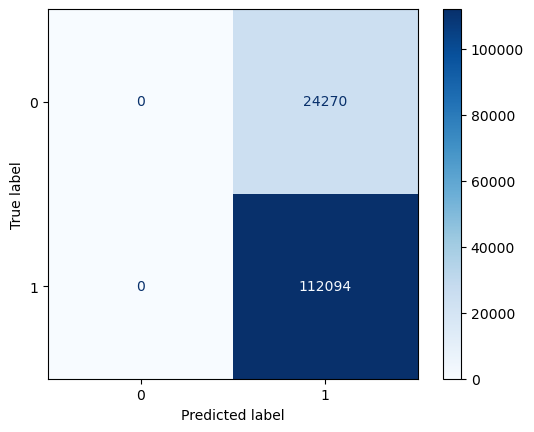

In [33]:
import tensorflow as tf
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Define the model
ann = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
ann.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
ann.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = ann.predict(X_test)
# Convert probabilities to binary labels
threshold = 0.5
y_pred = (y_pred > threshold).astype(int)

# Calculate evaluation metrics
p = precision_score(y_test, y_pred)
r = recall_score(y_test, y_pred)
a = accuracy_score(y_test, y_pred)
f = f1_score(y_test, y_pred)

print("precision score", p)
print("recall score", r)
print("accuracy score", a)
print("f1 score", f)

# Plot confusion matrix using ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=[0, 1])
cmd.plot(cmap=plt.cm.Blues)
plt.show()

25% of the Dataset

In [35]:
data_s1=pd.read_csv("D:/Downloads/under_s1.csv")
data_s1.head(10)

,Age,State,residence,education,drinking_water,toilet_facility,Religion,cooking_fuel,Wealth,Currently_pregnant,children,Currently_breastfeeding,marital_status,Births,Bmi
0,35-49,Rajasthan,Rural,No education,Safe,Hygenic,Hindu,Unimproved,Middle,No,three-four,No,Married,one-two,0
1,35-49,Jammu & Kashmir,Urban,Higher,Safe,Hygenic,Muslim,Improved,Rich,No,one-two,No,Married,No births,1
2,25-34,Chhattisgarh,Rural,No education,Safe,Hygenic,Hindu,Unimproved,Poor,No,No,No,Married,one-two,1
3,25-34,Jammu & Kashmir,Rural,Secondary,Safe,Hygenic,Hindu,Improved,Rich,No,one-two,No,Married,No births,1
4,15-24,Assam,Rural,Secondary,Safe,Hygenic,Muslim,Unimproved,Poor,No,No,No,Never in union,No births,1
5,25-34,Karnataka,Rural,Secondary,Safe,Hygenic,Hindu,Improved,Rich,No,one-two,No,Married,one-two,1
6,35-49,Madhya Pradesh,Rural,No education,Safe,Unhygenic,Hindu,Unimproved,Poor,No,one-two,No,Married,No births,1
7,25-34,Odisha,Rural,Secondary,Safe,Hygenic,Hindu,Improved,Middle,No,one-two,No,Married,one-two,1
8,25-34,Haryana,Urban,Secondary,Safe,Hygenic,Hindu,Improved,Rich,No,No,No,Never in union,No births,1
9,25-34,Madhya Pradesh,Rural,Secondary,Safe,Hygenic,Hindu,Unimproved,Middle,No,one-two,Yes,Married,No births,1


In [36]:
data_s1.shape

(170454, 15)

In [37]:
dummies_state = pd.get_dummies(data_s1.State, dtype=int)
dummies_state.head(10)

,Andaman & Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Dadra & Nagar Haveli And Daman & Diu,Goa,Gujarat,...,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
dummies_age = pd.get_dummies(data_s1.Age, dtype=int)
dummies_age.head(10)

,15-24,25-34,35-49
0,0,0,1
1,0,0,1
2,0,1,0
3,0,1,0
4,1,0,0
5,0,1,0
6,0,0,1
7,0,1,0
8,0,1,0
9,0,1,0


In [39]:
dummies_res = pd.get_dummies(data_s1.residence, dtype=int)
dummies_res.head(10)

,Rural,Urban
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,0,1
9,1,0


In [40]:
dummies_edu = pd.get_dummies(data_s1.education, dtype=int)
dummies_edu.head(10)

,Higher,No education,Primary,Secondary
0,0,1,0,0
1,1,0,0,0
2,0,1,0,0
3,0,0,0,1
4,0,0,0,1
5,0,0,0,1
6,0,1,0,0
7,0,0,0,1
8,0,0,0,1
9,0,0,0,1


In [41]:
dummies_water = pd.get_dummies(data_s1.drinking_water, dtype=int)
dummies_water.head(10)

,Safe,Unsafe
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [42]:
dummies_toilet = pd.get_dummies(data_s1.toilet_facility, dtype=int)
dummies_toilet.head(10)

,Hygenic,Unhygenic
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,0,1
7,1,0
8,1,0
9,1,0


In [43]:
dummies_religion = pd.get_dummies(data_s1.Religion, dtype=int)
dummies_religion.head(10)

,Christian,Hindu,Muslim,Other
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,1,0
5,0,1,0,0
6,0,1,0,0
7,0,1,0,0
8,0,1,0,0
9,0,1,0,0


In [44]:
dummies_fuel = pd.get_dummies(data_s1.cooking_fuel, dtype=int)
dummies_fuel.head(10)

,Improved,Unimproved
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
5,1,0
6,0,1
7,1,0
8,1,0
9,0,1


In [45]:
dummies_wealth = pd.get_dummies(data_s1.Wealth, dtype=int)
dummies_wealth.head(10)

,Middle,Poor,Rich
0,1,0,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,0
5,0,0,1
6,0,1,0
7,1,0,0
8,0,0,1
9,1,0,0


In [46]:
dummies_pregnant = pd.get_dummies(data_s1.Currently_pregnant, dtype=int)
dummies_pregnant.head(10)

,No,Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [47]:
dummies_children = pd.get_dummies(data_s1.children, dtype=int)
dummies_children.head(10)

,No,five or more,one-two,three-four
0,0,0,0,1
1,0,0,1,0
2,1,0,0,0
3,0,0,1,0
4,1,0,0,0
5,0,0,1,0
6,0,0,1,0
7,0,0,1,0
8,1,0,0,0
9,0,0,1,0


In [48]:
dummies_breastfeeding = pd.get_dummies(data_s1.Currently_breastfeeding, dtype=int)
dummies_breastfeeding.head(10)

,No,Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,0,1


In [49]:
dummies_marital = pd.get_dummies(data_s1.marital_status, dtype=int)
dummies_marital.head(10)

,Divorced,Married,Never in union,Widowed,together/separated
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0
5,0,1,0,0,0
6,0,1,0,0,0
7,0,1,0,0,0
8,0,0,1,0,0
9,0,1,0,0,0


In [50]:
dummies_births = pd.get_dummies(data_s1.Births, dtype=int)
dummies_births.head(10)

,No births,five or more,one-two,three-four
0,0,0,1,0
1,1,0,0,0
2,0,0,1,0
3,1,0,0,0
4,1,0,0,0
5,0,0,1,0
6,1,0,0,0
7,0,0,1,0
8,1,0,0,0
9,1,0,0,0


In [51]:
d_s1 = pd.concat([data_s1,dummies_age,dummies_res,dummies_edu,dummies_water,dummies_toilet,dummies_fuel,dummies_wealth,dummies_pregnant,dummies_children,dummies_breastfeeding,dummies_marital,dummies_births],axis='columns')
d_s1

,Age,State,residence,education,drinking_water,toilet_facility,Religion,cooking_fuel,Wealth,Currently_pregnant,...,Yes,Divorced,Married,Never in union,Widowed,together/separated,No births,five or more,one-two,three-four
0,35-49,Rajasthan,Rural,No education,Safe,Hygenic,Hindu,Unimproved,Middle,No,...,0,0,1,0,0,0,0,0,1,0
1,35-49,Jammu & Kashmir,Urban,Higher,Safe,Hygenic,Muslim,Improved,Rich,No,...,0,0,1,0,0,0,1,0,0,0
2,25-34,Chhattisgarh,Rural,No education,Safe,Hygenic,Hindu,Unimproved,Poor,No,...,0,0,1,0,0,0,0,0,1,0
3,25-34,Jammu & Kashmir,Rural,Secondary,Safe,Hygenic,Hindu,Improved,Rich,No,...,0,0,1,0,0,0,1,0,0,0
4,15-24,Assam,Rural,Secondary,Safe,Hygenic,Muslim,Unimproved,Poor,No,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170449,35-49,Tamil Nadu,Urban,Secondary,Safe,Hygenic,Hindu,Improved,Poor,No,...,0,0,1,0,0,0,0,0,1,0
170450,15-24,Dadra & Nagar Haveli And Daman & Diu,Rural,Higher,Safe,Hygenic,Hindu,Improved,Rich,No,...,0,0,0,1,0,0,1,0,0,0
170451,25-34,Uttar Pradesh,Rural,Secondary,Safe,Hygenic,Hindu,Unimproved,Rich,No,...,0,0,1,0,0,0,1,0,0,0
170452,15-24,Odisha,Rural,Secondary,Safe,Hygenic,Hindu,Unimproved,Poor,No,...,0,0,0,1,0,0,1,0,0,0


In [52]:
columns_to_remove = ['Age', 'State','residence', 'education', 'drinking_water', 'toilet_facility','Religion', 'cooking_fuel', 'Wealth', 'Currently_pregnant', 'children', 'Currently_breastfeeding', 'marital_status', 'Births']


# Read your dataset into a DataFrame
df_s1 = d_s1

# Drop the specified columns
df_s1.drop(columns=columns_to_remove, inplace=True)

In [53]:
df_s1.head()

,Bmi,15-24,25-34,35-49,Rural,Urban,Higher,No education,Primary,Secondary,...,Yes,Divorced,Married,Never in union,Widowed,together/separated,No births,five or more,one-two,three-four
0,0,0,0,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,0,0,1,0,1,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,1,0,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,1,0,1,0,1,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
4,1,1,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0


In [54]:
X_s1 = df_s1.drop('Bmi',axis = 'columns')
X_s1.head()

,15-24,25-34,35-49,Rural,Urban,Higher,No education,Primary,Secondary,Safe,...,Yes,Divorced,Married,Never in union,Widowed,together/separated,No births,five or more,one-two,three-four
0,0,0,1,1,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,0,1,1,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
2,0,1,0,1,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3,0,1,0,1,0,0,0,0,1,1,...,0,0,1,0,0,0,1,0,0,0
4,1,0,0,1,0,0,0,0,1,1,...,0,0,0,1,0,0,1,0,0,0


In [55]:
y_s1 = df_s1.Bmi
y_s1.head()

0    0
1    1
2    1
3    1
4    1
Name: Bmi, dtype: int64

In [56]:
from sklearn.model_selection import train_test_split
X_s1_train, X_s1_test, y_s1_train, y_s1_test = train_test_split(X_s1,y_s1,test_size=0.2,random_state=10)

precision score 0.820374146644206
recall score 0.9934507193472193
accuracy score 0.8163444897480273
f1 score 0.8986548827271402


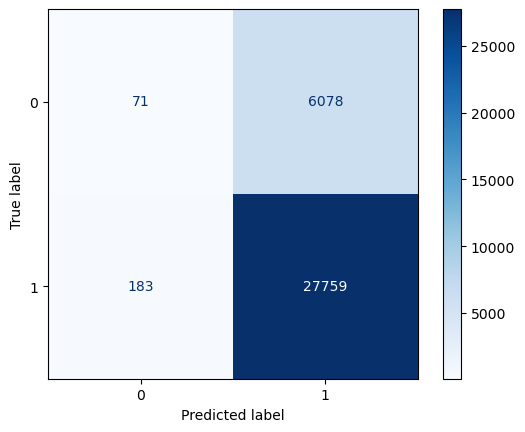

In [57]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

rf_s1_classifier = RandomForestClassifier()
rf_s1_classifier.fit(X_s1_train, y_s1_train)

# Predict on the test set
y_s1_pred = rf_s1_classifier.predict(X_s1_test)

# Calculate evaluation metrics
p = precision_score(y_s1_test, y_s1_pred)
r = recall_score(y_s1_test, y_s1_pred)
a = accuracy_score(y_s1_test, y_s1_pred)
f = f1_score(y_s1_test, y_s1_pred)

print("precision score", p)
print("recall score", r)
print("accuracy score", a)
print("f1 score", f)

# Plot confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_s1_test, y_s1_pred, labels=rf_s1_classifier.classes_), display_labels=rf_s1_classifier.classes_)
cmd.plot(cmap=plt.cm.Blues)  # Setting colormap to Blues for blue shades
plt.show()

precision score 0.9244300591049817
recall score 0.23509412354162193
accuracy score 0.3573083805109853
f1 score 0.37485733850719016


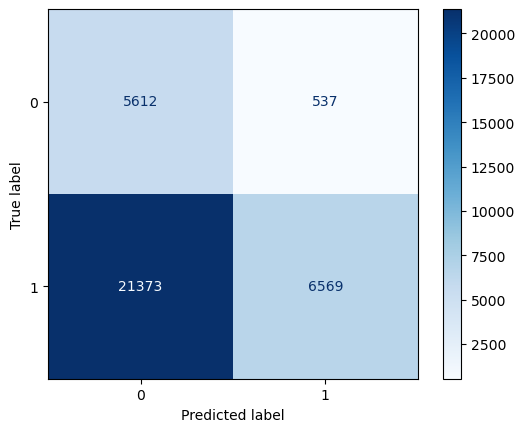

In [58]:
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

nb_s1_classifier = GaussianNB()
nb_s1_classifier.fit(X_s1_train, y_s1_train)

# Predict on the test set
y_s1_pred = nb_s1_classifier.predict(X_s1_test)

# Calculate evaluation metrics
p = precision_score(y_s1_test, y_s1_pred)
r = recall_score(y_s1_test, y_s1_pred)
a = accuracy_score(y_s1_test, y_s1_pred)
f = f1_score(y_s1_test, y_s1_pred)

print("precision score", p)
print("recall score", r)
print("accuracy score", a)
print("f1 score", f)

# Plot confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_s1_test, y_s1_pred, labels=nb_s1_classifier.classes_), display_labels=nb_s1_classifier.classes_)
cmd.plot(cmap=plt.cm.Blues)  # Setting colormap to Blues for blue shades
plt.show()

precision score 0.8203059888081915
recall score 0.9862930355736883
accuracy score 0.8116805021853275
f1 score 0.8956742175566316


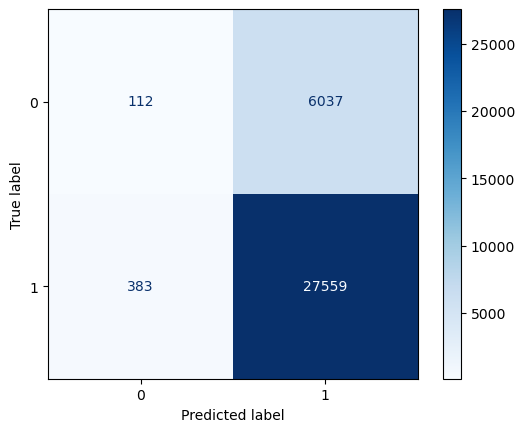

In [59]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

dt_s1_classifier = DecisionTreeClassifier(random_state=100)
dt_s1_classifier.fit(X_s1_train, y_s1_train)

# Predict on the test set
y_s1_pred = dt_s1_classifier.predict(X_s1_test)

# Calculate evaluation metrics
p = precision_score(y_s1_test, y_s1_pred)
r = recall_score(y_s1_test, y_s1_pred)
a = accuracy_score(y_s1_test, y_s1_pred)
f = f1_score(y_s1_test, y_s1_pred)

print("precision score", p)
print("recall score", r)
print("accuracy score", a)
print("f1 score", f)

# Plot confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_s1_test, y_s1_pred, labels=dt_s1_classifier.classes_), display_labels=dt_s1_classifier.classes_)
cmd.plot(cmap=plt.cm.Blues)  # Setting colormap to Blues for blue shades
plt.show()

precision score 0.8198338373014709
recall score 0.9994273852981175
accuracy score 0.8195124813000498
f1 score 0.900766067252641


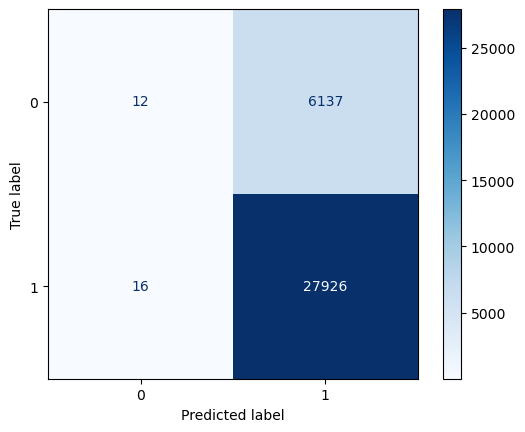

In [60]:
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

mlp_s1_classifier = MLPClassifier(random_state=100)
mlp_s1_classifier.fit(X_s1_train, y_s1_train)

# Predict on the test set
y_s1_pred = mlp_s1_classifier.predict(X_s1_test)

# Calculate evaluation metrics
p = precision_score(y_s1_test, y_s1_pred)
r = recall_score(y_s1_test, y_s1_pred)
a = accuracy_score(y_s1_test, y_s1_pred)
f = f1_score(y_s1_test, y_s1_pred)

print("precision score", p)
print("recall score", r)
print("accuracy score", a)
print("f1 score", f)

# Plot confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_s1_test, y_s1_pred, labels=mlp_s1_classifier.classes_), display_labels=mlp_s1_classifier.classes_)
cmd.plot(cmap=plt.cm.Blues)  # Setting colormap to Blues for blue shades
plt.show()

precision score 0.8305382827711827
recall score 0.946460525373989
accuracy score 0.7978352057727847
f1 score 0.8847183192827512


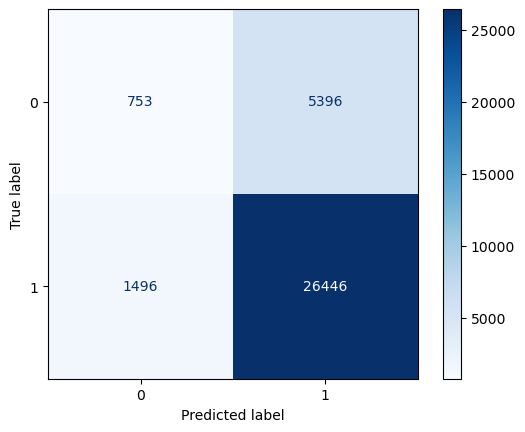

In [61]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

knn_s1_classifier = KNeighborsClassifier()
knn_s1_classifier.fit(X_s1_train, y_s1_train)

# Predict on the test set
y_s1_pred = knn_s1_classifier.predict(X_s1_test)

# Calculate evaluation metrics
p = precision_score(y_s1_test, y_s1_pred)
r = recall_score(y_s1_test, y_s1_pred)
a = accuracy_score(y_s1_test, y_s1_pred)
f = f1_score(y_s1_test, y_s1_pred)

print("precision score", p)
print("recall score", r)
print("accuracy score", a)
print("f1 score", f)

# Plot confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_s1_test, y_s1_pred, labels=knn_s1_classifier.classes_), display_labels=knn_s1_classifier.classes_)
cmd.plot(cmap=plt.cm.Blues)  # Setting colormap to Blues for blue shades
plt.show()

Epoch 1/20
4262/4262 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.8199 - loss: 0.4356 - val_accuracy: 0.8196 - val_loss: 0.4300
Epoch 2/20
4262/4262 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8211 - loss: 0.4285 - val_accuracy: 0.8196 - val_loss: 0.4294
Epoch 3/20
4262/4262 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.8199 - loss: 0.4295 - val_accuracy: 0.8196 - val_loss: 0.4320
Epoch 4/20
4262/4262 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8198 - loss: 0.4295 - val_accuracy: 0.8196 - val_loss: 0.4324
Epoch 5/20
4262/4262 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8215 - loss: 0.4262 - val_accuracy: 0.8196 - val_loss: 0.4301
Epoch 6/20
4262/4262 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8209 - loss: 0.4274 - val_accuracy: 0.8196 - val_loss: 0.4301
Epoch 7/20
4262/4262 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8201 - loss: 0.4286 - val_accuracy: 0.8196 - val_loss: 0.4293
Epoch 8/20
4262/4262 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8205 - loss: 0.4271 

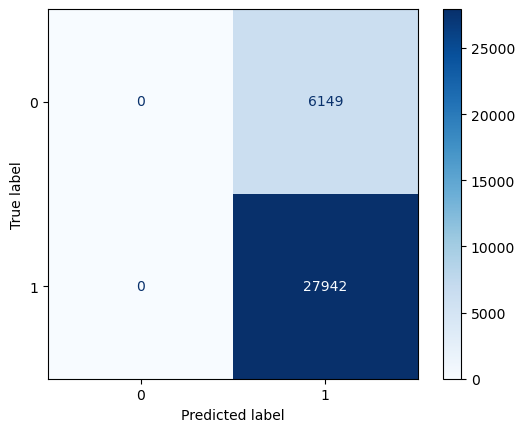

In [62]:
import tensorflow as tf
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Define the model
ann = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
ann.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
ann.fit(X_s1_train, y_s1_train, epochs=20, batch_size=32, validation_data=(X_s1_test, y_s1_test))

# Evaluate the model
y_s1_pred = ann.predict(X_s1_test)
# Convert probabilities to binary labels
threshold = 0.5
y_s1_pred = (y_s1_pred > threshold).astype(int)

# Calculate evaluation metrics
p = precision_score(y_s1_test, y_s1_pred)
r = recall_score(y_s1_test, y_s1_pred)
a = accuracy_score(y_s1_test, y_s1_pred)
f = f1_score(y_s1_test, y_s1_pred)

print("precision score", p)
print("recall score", r)
print("accuracy score", a)
print("f1 score", f)

# Plot confusion matrix using ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_s1_test, y_s1_pred), display_labels=[0, 1])
cmd.plot(cmap=plt.cm.Blues)
plt.show()

50% of the Dataset

In [122]:
data_s2=pd.read_csv("D:/Downloads/under_s2.csv")
data_s2.head(10)

,Age,State,residence,education,drinking_water,toilet_facility,Religion,cooking_fuel,Wealth,Currently_pregnant,children,Currently_breastfeeding,marital_status,Births,Bmi
0,35-49,Rajasthan,Rural,No education,Safe,Hygenic,Hindu,Unimproved,Middle,No,three-four,No,Married,one-two,0
1,35-49,Jammu & Kashmir,Urban,Higher,Safe,Hygenic,Muslim,Improved,Rich,No,one-two,No,Married,No births,1
2,25-34,Chhattisgarh,Rural,No education,Safe,Hygenic,Hindu,Unimproved,Poor,No,No,No,Married,one-two,1
3,25-34,Jammu & Kashmir,Rural,Secondary,Safe,Hygenic,Hindu,Improved,Rich,No,one-two,No,Married,No births,1
4,15-24,Assam,Rural,Secondary,Safe,Hygenic,Muslim,Unimproved,Poor,No,No,No,Never in union,No births,1
5,25-34,Karnataka,Rural,Secondary,Safe,Hygenic,Hindu,Improved,Rich,No,one-two,No,Married,one-two,1
6,35-49,Madhya Pradesh,Rural,No education,Safe,Unhygenic,Hindu,Unimproved,Poor,No,one-two,No,Married,No births,1
7,25-34,Odisha,Rural,Secondary,Safe,Hygenic,Hindu,Improved,Middle,No,one-two,No,Married,one-two,1
8,25-34,Haryana,Urban,Secondary,Safe,Hygenic,Hindu,Improved,Rich,No,No,No,Never in union,No births,1
9,25-34,Madhya Pradesh,Rural,Secondary,Safe,Hygenic,Hindu,Unimproved,Middle,No,one-two,Yes,Married,No births,1


In [123]:
data_s2.shape

(340909, 15)

In [124]:
dummies_state = pd.get_dummies(data_s2.State, dtype=int)
dummies_state.head(10)

,Andaman & Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Dadra & Nagar Haveli And Daman & Diu,Goa,Gujarat,...,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
dummies_age = pd.get_dummies(data_s2.Age, dtype=int)
dummies_age.head(10)

,15-24,25-34,35-49
0,0,0,1
1,0,0,1
2,0,1,0
3,0,1,0
4,1,0,0
5,0,1,0
6,0,0,1
7,0,1,0
8,0,1,0
9,0,1,0


In [126]:
dummies_res = pd.get_dummies(data_s2.residence, dtype=int)
dummies_res.head(10)

,Rural,Urban
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,0,1
9,1,0


In [127]:
dummies_edu = pd.get_dummies(data_s2.education, dtype=int)
dummies_edu.head(10)

,Higher,No education,Primary,Secondary
0,0,1,0,0
1,1,0,0,0
2,0,1,0,0
3,0,0,0,1
4,0,0,0,1
5,0,0,0,1
6,0,1,0,0
7,0,0,0,1
8,0,0,0,1
9,0,0,0,1


In [128]:
dummies_water = pd.get_dummies(data_s2.drinking_water, dtype=int)
dummies_water.head(10)

,Safe,Unsafe
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [129]:
dummies_toilet = pd.get_dummies(data_s2.toilet_facility, dtype=int)
dummies_toilet.head(10)

,Hygenic,Unhygenic
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,0,1
7,1,0
8,1,0
9,1,0


In [130]:
dummies_religion = pd.get_dummies(data_s2.Religion, dtype=int)
dummies_religion.head(10)

,Christian,Hindu,Muslim,Other
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,1,0
5,0,1,0,0
6,0,1,0,0
7,0,1,0,0
8,0,1,0,0
9,0,1,0,0


In [131]:
dummies_fuel = pd.get_dummies(data_s2.cooking_fuel, dtype=int)
dummies_fuel.head(10)

,Improved,Unimproved
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
5,1,0
6,0,1
7,1,0
8,1,0
9,0,1


In [132]:
dummies_wealth = pd.get_dummies(data_s2.Wealth, dtype=int)
dummies_wealth.head(10)

,Middle,Poor,Rich
0,1,0,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,0
5,0,0,1
6,0,1,0
7,1,0,0
8,0,0,1
9,1,0,0


In [133]:
dummies_pregnant = pd.get_dummies(data_s2.Currently_pregnant, dtype=int)
dummies_pregnant.head(10)

,No,Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [134]:
dummies_children = pd.get_dummies(data_s2.children, dtype=int)
dummies_children.head(10)

,No,five or more,one-two,three-four
0,0,0,0,1
1,0,0,1,0
2,1,0,0,0
3,0,0,1,0
4,1,0,0,0
5,0,0,1,0
6,0,0,1,0
7,0,0,1,0
8,1,0,0,0
9,0,0,1,0


In [135]:
dummies_children = pd.get_dummies(data_s2.children, dtype=int)
dummies_children.head(10)

,No,five or more,one-two,three-four
0,0,0,0,1
1,0,0,1,0
2,1,0,0,0
3,0,0,1,0
4,1,0,0,0
5,0,0,1,0
6,0,0,1,0
7,0,0,1,0
8,1,0,0,0
9,0,0,1,0


In [136]:
dummies_breastfeeding = pd.get_dummies(data_s2.Currently_breastfeeding, dtype=int)
dummies_breastfeeding.head(10)

,No,Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,0,1


In [137]:
dummies_marital = pd.get_dummies(data_s2.marital_status, dtype=int)
dummies_marital.head(10)

,Divorced,Married,Never in union,Widowed,together/separated
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0
5,0,1,0,0,0
6,0,1,0,0,0
7,0,1,0,0,0
8,0,0,1,0,0
9,0,1,0,0,0


In [138]:
dummies_births = pd.get_dummies(data_s2.Births, dtype=int)
dummies_births.head(10)

,No births,five or more,one-two,three-four
0,0,0,1,0
1,1,0,0,0
2,0,0,1,0
3,1,0,0,0
4,1,0,0,0
5,0,0,1,0
6,1,0,0,0
7,0,0,1,0
8,1,0,0,0
9,1,0,0,0


In [139]:
d_s2 = pd.concat([data_s2,dummies_age,dummies_res,dummies_edu,dummies_water,dummies_toilet,dummies_fuel,dummies_wealth,dummies_pregnant,dummies_children,dummies_breastfeeding,dummies_marital,dummies_births],axis='columns')
d_s2

,Age,State,residence,education,drinking_water,toilet_facility,Religion,cooking_fuel,Wealth,Currently_pregnant,...,Yes,Divorced,Married,Never in union,Widowed,together/separated,No births,five or more,one-two,three-four
0,35-49,Rajasthan,Rural,No education,Safe,Hygenic,Hindu,Unimproved,Middle,No,...,0,0,1,0,0,0,0,0,1,0
1,35-49,Jammu & Kashmir,Urban,Higher,Safe,Hygenic,Muslim,Improved,Rich,No,...,0,0,1,0,0,0,1,0,0,0
2,25-34,Chhattisgarh,Rural,No education,Safe,Hygenic,Hindu,Unimproved,Poor,No,...,0,0,1,0,0,0,0,0,1,0
3,25-34,Jammu & Kashmir,Rural,Secondary,Safe,Hygenic,Hindu,Improved,Rich,No,...,0,0,1,0,0,0,1,0,0,0
4,15-24,Assam,Rural,Secondary,Safe,Hygenic,Muslim,Unimproved,Poor,No,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340904,35-49,Gujarat,Rural,Secondary,Safe,Hygenic,Hindu,Improved,Rich,No,...,0,0,0,0,1,0,0,0,1,0
340905,35-49,Himachal Pradesh,Urban,Higher,Safe,Hygenic,Hindu,Improved,Rich,No,...,0,0,1,0,0,0,1,0,0,0
340906,25-34,Tamil Nadu,Rural,Higher,Safe,Hygenic,Hindu,Improved,Rich,No,...,0,0,1,0,0,0,1,0,0,0
340907,35-49,Meghalaya,Urban,Secondary,Safe,Hygenic,Christian,Improved,Middle,No,...,0,0,1,0,0,0,1,0,0,0


In [140]:
columns_to_remove = ['Age', 'State','residence', 'education', 'drinking_water', 'toilet_facility','Religion', 'cooking_fuel', 'Wealth', 'Currently_pregnant', 'children', 'Currently_breastfeeding', 'marital_status', 'Births']


# Read your dataset into a DataFrame
df_s2 = d_s2

# Drop the specified columns
df_s2.drop(columns=columns_to_remove, inplace=True)

In [141]:
df_s2.head()

,Bmi,15-24,25-34,35-49,Rural,Urban,Higher,No education,Primary,Secondary,...,Yes,Divorced,Married,Never in union,Widowed,together/separated,No births,five or more,one-two,three-four
0,0,0,0,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,0,0,1,0,1,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,1,0,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,1,0,1,0,1,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
4,1,1,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0


In [142]:
X_s2 = df_s2.drop('Bmi',axis = 'columns')
X_s2.head()

,15-24,25-34,35-49,Rural,Urban,Higher,No education,Primary,Secondary,Safe,...,Yes,Divorced,Married,Never in union,Widowed,together/separated,No births,five or more,one-two,three-four
0,0,0,1,1,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,0,1,1,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
2,0,1,0,1,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3,0,1,0,1,0,0,0,0,1,1,...,0,0,1,0,0,0,1,0,0,0
4,1,0,0,1,0,0,0,0,1,1,...,0,0,0,1,0,0,1,0,0,0


In [143]:
y_s2 = df_s2.Bmi
y_s2.head()

0    0
1    1
2    1
3    1
4    1
Name: Bmi, dtype: int64

In [144]:
from sklearn.model_selection import train_test_split
X_s2_train, X_s2_test, y_s2_train, y_s2_test = train_test_split(X_s2,y_s2,test_size=0.2,random_state=10)

precision score 0.8196941120999588
recall score 0.9957222122785037
accuracy score 0.8170191546155877
f1 score 0.8991740613231183


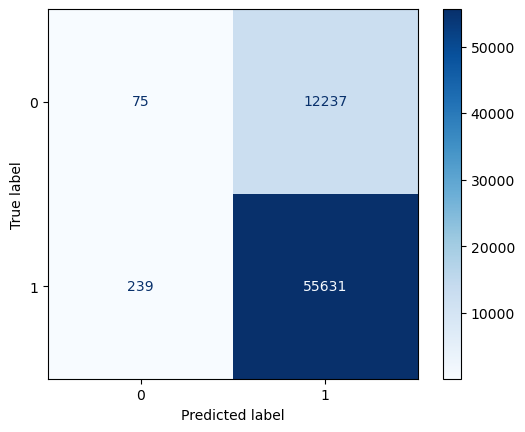

In [145]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

rf_s2_classifier = RandomForestClassifier()
rf_s2_classifier.fit(X_s2_train, y_s2_train)

# Predict on the test set
y_s2_pred = rf_s2_classifier.predict(X_s2_test)

# Calculate evaluation metrics
p = precision_score(y_s2_test, y_s2_pred)
r = recall_score(y_s2_test, y_s2_pred)
a = accuracy_score(y_s2_test, y_s2_pred)
f = f1_score(y_s2_test, y_s2_pred)

print("precision score", p)
print("recall score", r)
print("accuracy score", a)
print("f1 score", f)

# Plot confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_s2_test, y_s2_pred, labels=rf_s2_classifier.classes_), display_labels=rf_s2_classifier.classes_)
cmd.plot(cmap=plt.cm.Blues)  # Setting colormap to Blues for blue shades
plt.show()

precision score 0.9254308590039354
recall score 0.24412027921961696
accuracy score 0.3644950280132586
f1 score 0.3863301608882846


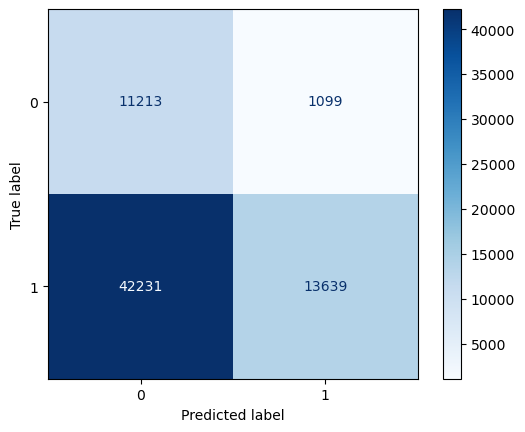

In [146]:
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

nb_s2_classifier = GaussianNB()
nb_s2_classifier.fit(X_s2_train, y_s2_train)

# Predict on the test set
y_s2_pred = nb_s2_classifier.predict(X_s2_test)

# Calculate evaluation metrics
p = precision_score(y_s2_test, y_s2_pred)
r = recall_score(y_s2_test, y_s2_pred)
a = accuracy_score(y_s2_test, y_s2_pred)
f = f1_score(y_s2_test, y_s2_pred)

print("precision score", p)
print("recall score", r)
print("accuracy score", a)
print("f1 score", f)

# Plot confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_s2_test, y_s2_pred, labels=nb_s2_classifier.classes_), display_labels=nb_s2_classifier.classes_)
cmd.plot(cmap=plt.cm.Blues)  # Setting colormap to Blues for blue shades
plt.show()

precision score 0.819910895339027
recall score 0.9914802219437981
accuracy score 0.8145698278137925
f1 score 0.8975703024361789


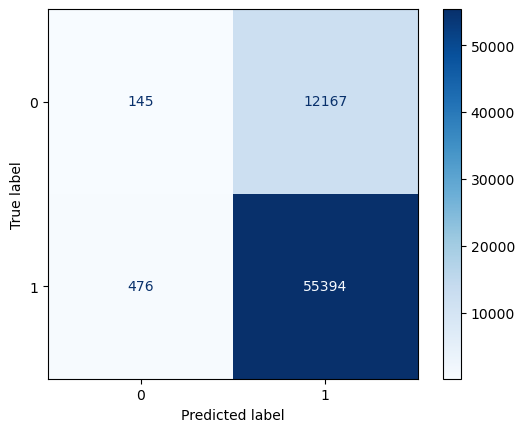

In [147]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

dt_s2_classifier = DecisionTreeClassifier(random_state=100)
dt_s2_classifier.fit(X_s2_train, y_s2_train)

# Predict on the test set
y_s2_pred = dt_s2_classifier.predict(X_s2_test)

# Calculate evaluation metrics
p = precision_score(y_s2_test, y_s2_pred)
r = recall_score(y_s2_test, y_s2_pred)
a = accuracy_score(y_s2_test, y_s2_pred)
f = f1_score(y_s2_test, y_s2_pred)

print("precision score", p)
print("recall score", r)
print("accuracy score", a)
print("f1 score", f)

# Plot confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_s2_test, y_s2_pred, labels=dt_s2_classifier.classes_), display_labels=dt_s2_classifier.classes_)
cmd.plot(cmap=plt.cm.Blues)  # Setting colormap to Blues for blue shades
plt.show()

precision score 0.8195557120638554
recall score 0.9997494182924647
accuracy score 0.8194244815347159
f1 score 0.9007288911823519


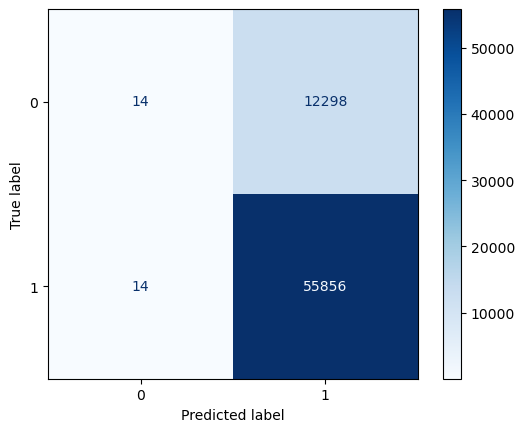

In [148]:
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

mlp_s2_classifier = MLPClassifier(random_state=100)
mlp_s2_classifier.fit(X_s2_train, y_s2_train)

# Predict on the test set
y_s2_pred = mlp_s2_classifier.predict(X_s2_test)

# Calculate evaluation metrics
p = precision_score(y_s2_test, y_s2_pred)
r = recall_score(y_s2_test, y_s2_pred)
a = accuracy_score(y_s2_test, y_s2_pred)
f = f1_score(y_s2_test, y_s2_pred)

print("precision score", p)
print("recall score", r)
print("accuracy score", a)
print("f1 score", f)

# Plot confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_s2_test, y_s2_pred, labels=mlp_s2_classifier.classes_), display_labels=mlp_s2_classifier.classes_)
cmd.plot(cmap=plt.cm.Blues)  # Setting colormap to Blues for blue shades
plt.show()

precision score 0.829992881436368
recall score 0.93910864506891
accuracy score 0.7924818867149688
f1 score 0.8811857076877859


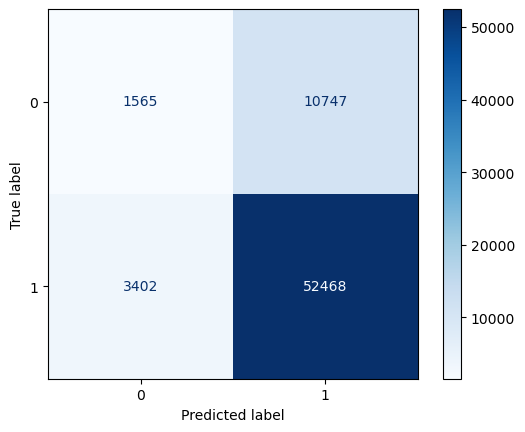

In [149]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

knn_s2_classifier = KNeighborsClassifier()
knn_s2_classifier.fit(X_s2_train, y_s2_train)

# Predict on the test set
y_s2_pred = knn_s2_classifier.predict(X_s2_test)

# Calculate evaluation metrics
p = precision_score(y_s2_test, y_s2_pred)
r = recall_score(y_s2_test, y_s2_pred)
a = accuracy_score(y_s2_test, y_s2_pred)
f = f1_score(y_s2_test, y_s2_pred)

print("precision score", p)
print("recall score", r)
print("accuracy score", a)
print("f1 score", f)

# Plot confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_s2_test, y_s2_pred, labels=knn_s2_classifier.classes_), display_labels=knn_s2_classifier.classes_)
cmd.plot(cmap=plt.cm.Blues)  # Setting colormap to Blues for blue shades
plt.show()

Epoch 1/20
8523/8523 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.8188 - loss: 0.4348 - val_accuracy: 0.8194 - val_loss: 0.4299
Epoch 2/20
8523/8523 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.8206 - loss: 0.4287 - val_accuracy: 0.8194 - val_loss: 0.4293
Epoch 3/20
8523/8523 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.8219 - loss: 0.4245 - val_accuracy: 0.8194 - val_loss: 0.4316
Epoch 4/20
8523/8523 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.8198 - loss: 0.4293 - val_accuracy: 0.8194 - val_loss: 0.4285
Epoch 5/20
8523/8523 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.8209 - loss: 0.4271 - val_accuracy: 0.8194 - val_loss: 0.4285
Epoch 6/20
8523/8523 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.8207 - loss: 0.4262 - val_accuracy: 0.8194 - val_loss: 0.4283
Epoch 7/20
8523/8523 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.8221 - loss: 0.4245 - val_accuracy: 0.8194 - val_loss: 0.4307
Epoch 8/20
8523/8523 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.8220 - loss: 0

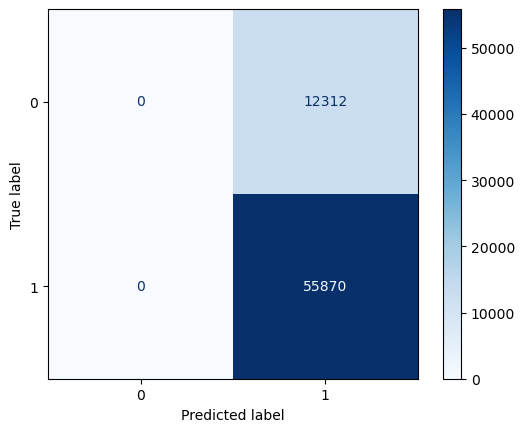

In [150]:
import tensorflow as tf
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Define the model
ann = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
ann.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
ann.fit(X_s2_train, y_s2_train, epochs=20, batch_size=32, validation_data=(X_s2_test, y_s2_test))

# Evaluate the model
y_s2_pred = ann.predict(X_s2_test)
# Convert probabilities to binary labels
threshold = 0.5
y_s2_pred = (y_s2_pred > threshold).astype(int)

# Calculate evaluation metrics
p = precision_score(y_s2_test, y_s2_pred)
r = recall_score(y_s2_test, y_s2_pred)
a = accuracy_score(y_s2_test, y_s2_pred)
f = f1_score(y_s2_test, y_s2_pred)

print("precision score", p)
print("recall score", r)
print("accuracy score", a)
print("f1 score", f)

# Plot confusion matrix using ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_s2_test, y_s2_pred), display_labels=[0, 1])
cmd.plot(cmap=plt.cm.Blues)
plt.show()

75% of the Dataset

In [94]:
data_s3=pd.read_csv("D:/Downloads/under_s3.csv")
data_s3.head(10)

,Age,State,residence,education,drinking_water,toilet_facility,Religion,cooking_fuel,Wealth,Currently_pregnant,children,Currently_breastfeeding,marital_status,Births,Bmi
0,25-34,Odisha,Urban,Higher,Safe,Hygenic,Hindu,Improved,Rich,No,No,No,Married,No births,1
1,15-24,Haryana,Urban,Secondary,Safe,Hygenic,Hindu,Improved,Rich,No,No,No,Never in union,one-two,0
2,15-24,Assam,Rural,Secondary,Safe,Hygenic,Hindu,Improved,Poor,No,No,No,Never in union,one-two,1
3,15-24,Bihar,Rural,Secondary,Safe,Unhygenic,Muslim,Unimproved,Poor,No,No,No,Never in union,No births,1
4,25-34,Chhattisgarh,Rural,Primary,Safe,Unhygenic,Hindu,Unimproved,Poor,No,one-two,Yes,Married,No births,1
5,25-34,Rajasthan,Rural,Secondary,Safe,Hygenic,Hindu,Improved,Rich,No,one-two,No,Married,No births,1
6,15-24,Uttar Pradesh,Rural,Secondary,Safe,Hygenic,Hindu,Improved,Poor,No,No,No,Never in union,No births,1
7,35-49,Uttar Pradesh,Rural,No education,Safe,Unhygenic,Hindu,Unimproved,Poor,No,three-four,No,Married,No births,0
8,15-24,Gujarat,Urban,Secondary,Safe,Hygenic,Hindu,Improved,Rich,No,No,No,Never in union,one-two,1
9,25-34,Chhattisgarh,Rural,Secondary,Safe,Unhygenic,Hindu,Unimproved,Poor,No,one-two,No,Married,No births,1


In [95]:
data_s3.shape

(511365, 15)

In [96]:
dummies_state = pd.get_dummies(data_s3.State, dtype=int)
dummies_state.head(10)

,Andaman & Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Dadra & Nagar Haveli And Daman & Diu,Goa,Gujarat,...,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
dummies_age = pd.get_dummies(data_s3.Age, dtype=int)
dummies_age.head(10)

,15-24,25-34,35-49
0,0,1,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,1,0
5,0,1,0
6,1,0,0
7,0,0,1
8,1,0,0
9,0,1,0


In [98]:
dummies_res = pd.get_dummies(data_s3.residence, dtype=int)
dummies_res.head(10)

,Rural,Urban
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,0,1
9,1,0


In [99]:
dummies_edu = pd.get_dummies(data_s3.education, dtype=int)
dummies_edu.head(10)

,Higher,No education,Primary,Secondary
0,1,0,0,0
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,1,0
5,0,0,0,1
6,0,0,0,1
7,0,1,0,0
8,0,0,0,1
9,0,0,0,1


In [100]:
dummies_water = pd.get_dummies(data_s3.drinking_water, dtype=int)
dummies_water.head(10)

,Safe,Unsafe
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [101]:
dummies_toilet = pd.get_dummies(data_s3.toilet_facility, dtype=int)
dummies_toilet.head(10)

,Hygenic,Unhygenic
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1
5,1,0
6,1,0
7,0,1
8,1,0
9,0,1


In [102]:
dummies_religion = pd.get_dummies(data_s3.Religion, dtype=int)
dummies_religion.head(10)

,Christian,Hindu,Muslim,Other
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,0,1,0
4,0,1,0,0
5,0,1,0,0
6,0,1,0,0
7,0,1,0,0
8,0,1,0,0
9,0,1,0,0


In [103]:
dummies_fuel = pd.get_dummies(data_s3.cooking_fuel, dtype=int)
dummies_fuel.head(10)

,Improved,Unimproved
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1
5,1,0
6,1,0
7,0,1
8,1,0
9,0,1


In [104]:
dummies_wealth = pd.get_dummies(data_s3.Wealth, dtype=int)
dummies_wealth.head(10)

,Middle,Poor,Rich
0,0,0,1
1,0,0,1
2,0,1,0
3,0,1,0
4,0,1,0
5,0,0,1
6,0,1,0
7,0,1,0
8,0,0,1
9,0,1,0


In [105]:
dummies_pregnant = pd.get_dummies(data_s3.Currently_pregnant, dtype=int)
dummies_pregnant.head(10)

,No,Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [106]:
dummies_children = pd.get_dummies(data_s3.children, dtype=int)
dummies_children.head(10)

,No,five or more,one-two,three-four
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,0,0,1,0
5,0,0,1,0
6,1,0,0,0
7,0,0,0,1
8,1,0,0,0
9,0,0,1,0


In [107]:
dummies_breastfeeding = pd.get_dummies(data_s3.Currently_breastfeeding, dtype=int)
dummies_breastfeeding.head(10)

,No,Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [108]:
dummies_marital = pd.get_dummies(data_s3.marital_status, dtype=int)
dummies_marital.head(10)

,Divorced,Married,Never in union,Widowed,together/separated
0,0,1,0,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,1,0,0,0
5,0,1,0,0,0
6,0,0,1,0,0
7,0,1,0,0,0
8,0,0,1,0,0
9,0,1,0,0,0


In [109]:
dummies_births = pd.get_dummies(data_s3.Births, dtype=int)
dummies_births.head(10)

,No births,five or more,one-two,three-four
0,1,0,0,0
1,0,0,1,0
2,0,0,1,0
3,1,0,0,0
4,1,0,0,0
5,1,0,0,0
6,1,0,0,0
7,1,0,0,0
8,0,0,1,0
9,1,0,0,0


In [110]:
d_s3 = pd.concat([data_s3,dummies_age,dummies_res,dummies_edu,dummies_water,dummies_toilet,dummies_fuel,dummies_wealth,dummies_pregnant,dummies_children,dummies_breastfeeding,dummies_marital,dummies_births],axis='columns')
d_s3

,Age,State,residence,education,drinking_water,toilet_facility,Religion,cooking_fuel,Wealth,Currently_pregnant,...,Yes,Divorced,Married,Never in union,Widowed,together/separated,No births,five or more,one-two,three-four
0,25-34,Odisha,Urban,Higher,Safe,Hygenic,Hindu,Improved,Rich,No,...,0,0,1,0,0,0,1,0,0,0
1,15-24,Haryana,Urban,Secondary,Safe,Hygenic,Hindu,Improved,Rich,No,...,0,0,0,1,0,0,0,0,1,0
2,15-24,Assam,Rural,Secondary,Safe,Hygenic,Hindu,Improved,Poor,No,...,0,0,0,1,0,0,0,0,1,0
3,15-24,Bihar,Rural,Secondary,Safe,Unhygenic,Muslim,Unimproved,Poor,No,...,0,0,0,1,0,0,1,0,0,0
4,25-34,Chhattisgarh,Rural,Primary,Safe,Unhygenic,Hindu,Unimproved,Poor,No,...,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511360,35-49,Kerala,Rural,Secondary,Safe,Hygenic,Hindu,Improved,Rich,No,...,0,0,1,0,0,0,1,0,0,0
511361,35-49,Assam,Rural,Primary,Safe,Hygenic,Hindu,Unimproved,Middle,No,...,0,0,1,0,0,0,1,0,0,0
511362,25-34,Tripura,Urban,Secondary,Safe,Hygenic,Hindu,Improved,Middle,No,...,0,0,1,0,0,0,1,0,0,0
511363,35-49,Odisha,Rural,Primary,Unsafe,Hygenic,Hindu,Unimproved,Poor,No,...,0,0,0,0,1,0,1,0,0,0


In [111]:
columns_to_remove = ['Age', 'State','residence', 'education', 'drinking_water', 'toilet_facility','Religion', 'cooking_fuel', 'Wealth', 'Currently_pregnant', 'children', 'Currently_breastfeeding', 'marital_status', 'Births']


# Read your dataset into a DataFrame
df_s3 = d_s3

# Drop the specified columns
df_s3.drop(columns=columns_to_remove, inplace=True)

In [112]:
df_s3.head()

,Bmi,15-24,25-34,35-49,Rural,Urban,Higher,No education,Primary,Secondary,...,Yes,Divorced,Married,Never in union,Widowed,together/separated,No births,five or more,one-two,three-four
0,1,0,1,0,0,1,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,1,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,1,1,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,1,1,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
4,1,0,1,0,1,0,0,0,1,0,...,1,0,1,0,0,0,1,0,0,0


In [113]:
X_s3 = df_s3.drop('Bmi',axis = 'columns')
X_s3.head()

,15-24,25-34,35-49,Rural,Urban,Higher,No education,Primary,Secondary,Safe,...,Yes,Divorced,Married,Never in union,Widowed,together/separated,No births,five or more,one-two,three-four
0,0,1,0,0,1,1,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
1,1,0,0,0,1,0,0,0,1,1,...,0,0,0,1,0,0,0,0,1,0
2,1,0,0,1,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,1,0
3,1,0,0,1,0,0,0,0,1,1,...,0,0,0,1,0,0,1,0,0,0
4,0,1,0,1,0,0,0,1,0,1,...,1,0,1,0,0,0,1,0,0,0


In [114]:
y_s3 = df_s3.Bmi
y_s3.head()

0    1
1    0
2    1
3    1
4    1
Name: Bmi, dtype: int64

In [115]:
from sklearn.model_selection import train_test_split
X_s3_train, X_s3_test, y_s3_train, y_s3_test = train_test_split(X_s3,y_s3,test_size=0.2,random_state=10)

precision score 0.8204735840543033
recall score 0.9967824200967658
accuracy score 0.8184075953575235
f1 score 0.9000753255138276


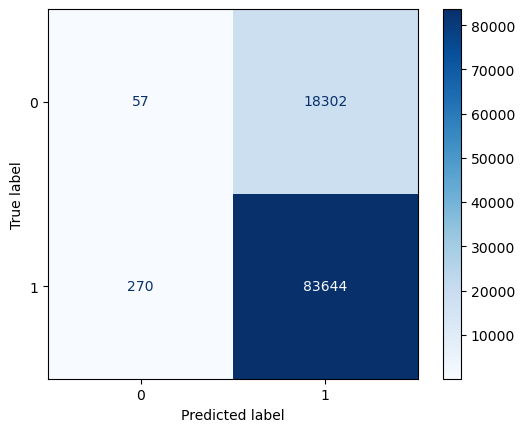

In [116]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

rf_s3_classifier = RandomForestClassifier()
rf_s3_classifier.fit(X_s3_train, y_s3_train)

# Predict on the test set
y_s3_pred = rf_s3_classifier.predict(X_s3_test)

# Calculate evaluation metrics
p = precision_score(y_s3_test, y_s3_pred)
r = recall_score(y_s3_test, y_s3_pred)
a = accuracy_score(y_s3_test, y_s3_pred)
f = f1_score(y_s3_test, y_s3_pred)

print("precision score", p)
print("recall score", r)
print("accuracy score", a)
print("f1 score", f)

# Plot confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_s3_test, y_s3_pred, labels=rf_s3_classifier.classes_), display_labels=rf_s3_classifier.classes_)
cmd.plot(cmap=plt.cm.Blues)  # Setting colormap to Blues for blue shades
plt.show()

precision score 0.8298225261529695
recall score 0.9717687155897705
accuracy score 0.8133231644715614
f1 score 0.8952036974014997


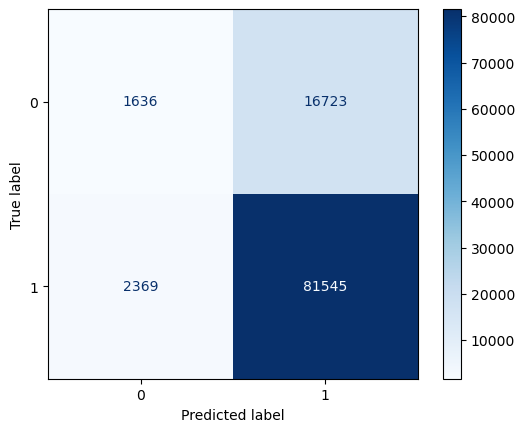

In [117]:
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

nb_s3_classifier = GaussianNB()
nb_s3_classifier.fit(X_s3_train, y_s3_train)

# Predict on the test set
y_s3_pred = nb_s3_classifier.predict(X_s3_test)

# Calculate evaluation metrics
p = precision_score(y_s3_test, y_s3_pred)
r = recall_score(y_s3_test, y_s3_pred)
a = accuracy_score(y_s3_test, y_s3_pred)
f = f1_score(y_s3_test, y_s3_pred)

print("precision score", p)
print("recall score", r)
print("accuracy score", a)
print("f1 score", f)

# Plot confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_s3_test, y_s3_pred, labels=nb_s3_classifier.classes_), display_labels=nb_s3_classifier.classes_)
cmd.plot(cmap=plt.cm.Blues)  # Setting colormap to Blues for blue shades
plt.show()

precision score 0.8203592225369846
recall score 0.9938865981838549
accuracy score 0.8164129340099537
f1 score 0.8988242140770998


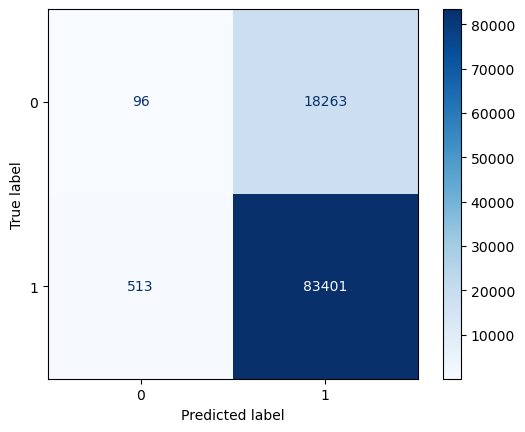

In [118]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

dt_s3_classifier = DecisionTreeClassifier(random_state=100)
dt_s3_classifier.fit(X_s3_train, y_s3_train)

# Predict on the test set
y_s3_pred = dt_s3_classifier.predict(X_s3_test)

# Calculate evaluation metrics
p = precision_score(y_s3_test, y_s3_pred)
r = recall_score(y_s3_test, y_s3_pred)
a = accuracy_score(y_s3_test, y_s3_pred)
f = f1_score(y_s3_test, y_s3_pred)

print("precision score", p)
print("recall score", r)
print("accuracy score", a)
print("f1 score", f)

# Plot confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_s3_test, y_s3_pred, labels=dt_s3_classifier.classes_), display_labels=dt_s3_classifier.classes_)
cmd.plot(cmap=plt.cm.Blues)  # Setting colormap to Blues for blue shades
plt.show()

precision score 0.8205012859755323
recall score 0.9998569964487452
accuracy score 0.820412034456797
f1 score 0.9013433886050997


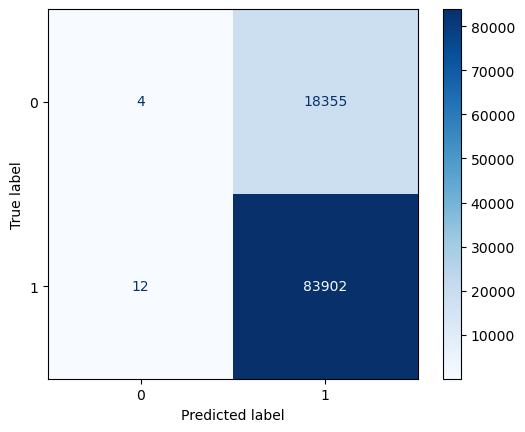

In [119]:
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

mlp_s3_classifier = MLPClassifier(random_state=100)
mlp_s3_classifier.fit(X_s3_train, y_s3_train)

# Predict on the test set
y_s3_pred = mlp_s3_classifier.predict(X_s3_test)

# Calculate evaluation metrics
p = precision_score(y_s3_test, y_s3_pred)
r = recall_score(y_s3_test, y_s3_pred)
a = accuracy_score(y_s3_test, y_s3_pred)
f = f1_score(y_s3_test, y_s3_pred)

print("precision score", p)
print("recall score", r)
print("accuracy score", a)
print("f1 score", f)

# Plot confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_s3_test, y_s3_pred, labels=mlp_s3_classifier.classes_), display_labels=mlp_s3_classifier.classes_)
cmd.plot(cmap=plt.cm.Blues)  # Setting colormap to Blues for blue shades
plt.show()

precision score 0.8322078684674105
recall score 0.9458016540744095
accuracy score 0.79906720248746
f1 score 0.8853761113776062


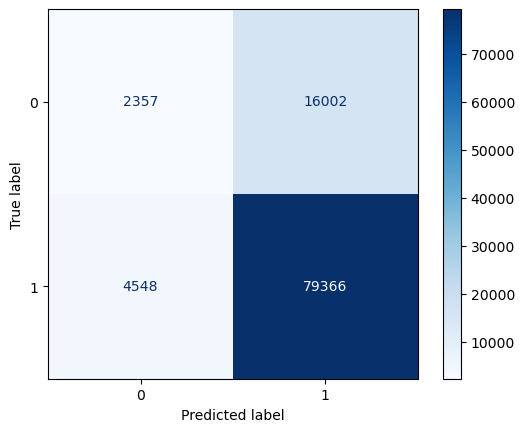

In [120]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

knn_s3_classifier = KNeighborsClassifier()
knn_s3_classifier.fit(X_s3_train, y_s3_train)

# Predict on the test set
y_s3_pred = knn_s3_classifier.predict(X_s3_test)

# Calculate evaluation metrics
p = precision_score(y_s3_test, y_s3_pred)
r = recall_score(y_s3_test, y_s3_pred)
a = accuracy_score(y_s3_test, y_s3_pred)
f = f1_score(y_s3_test, y_s3_pred)

print("precision score", p)
print("recall score", r)
print("accuracy score", a)
print("f1 score", f)

# Plot confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_s3_test, y_s3_pred, labels=knn_s3_classifier.classes_), display_labels=knn_s3_classifier.classes_)
cmd.plot(cmap=plt.cm.Blues)  # Setting colormap to Blues for blue shades
plt.show()

Epoch 1/20
12785/12785 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step - accuracy: 0.8214 - loss: 0.4297 - val_accuracy: 0.8205 - val_loss: 0.4275
Epoch 2/20
12785/12785 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - accuracy: 0.8224 - loss: 0.4249 - val_accuracy: 0.8205 - val_loss: 0.4261
Epoch 3/20
12785/12785 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - accuracy: 0.8223 - loss: 0.4247 - val_accuracy: 0.8205 - val_loss: 0.4267
Epoch 4/20
12785/12785 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - accuracy: 0.8219 - loss: 0.4253 - val_accuracy: 0.8205 - val_loss: 0.4274
Epoch 5/20
12785/12785 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - accuracy: 0.8227 - loss: 0.4237 - val_accuracy: 0.8205 - val_loss: 0.4270
Epoch 6/20
12785/12785 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - accuracy: 0.8219 - loss: 0.4245 - val_accuracy: 0.8205 - val_loss: 0.4261
Epoch 7/20
12785/12785 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step - accuracy: 0.8233 - loss: 0.4221 - val_accuracy: 0.8205 - val_loss: 0.4271
Epoch 8/20
12785/12785 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 

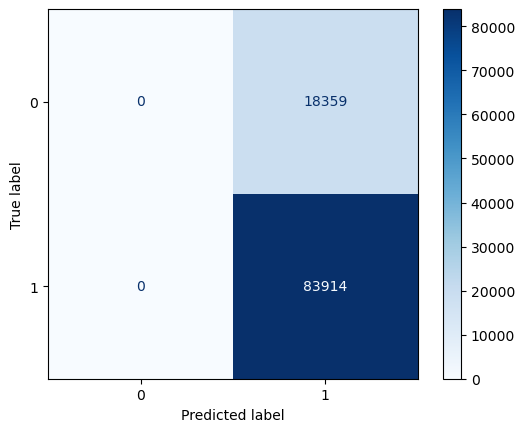

In [121]:
import tensorflow as tf
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Define the model
ann = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
ann.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
ann.fit(X_s3_train, y_s3_train, epochs=20, batch_size=32, validation_data=(X_s3_test, y_s3_test))

# Evaluate the model
y_s3_pred = ann.predict(X_s3_test)
# Convert probabilities to binary labels
threshold = 0.5
y_s3_pred = (y_s3_pred > threshold).astype(int)

# Calculate evaluation metrics
p = precision_score(y_s3_test, y_s3_pred)
r = recall_score(y_s3_test, y_s3_pred)
a = accuracy_score(y_s3_test, y_s3_pred)
f = f1_score(y_s3_test, y_s3_pred)

print("precision score", p)
print("recall score", r)
print("accuracy score", a)
print("f1 score", f)

# Plot confusion matrix using ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_s3_test, y_s3_pred), display_labels=[0, 1])
cmd.plot(cmap=plt.cm.Blues)
plt.show()

Saving the model architecture to JSON

In [30]:
# Saving the model architecture to JSON and the weights to HDF5
model_json = ann_model1.to_json()
with open("model_architecture1.json", "w") as json_file:
    json_file.write(model_json)
ann_model1.save_weights("model_weights1.weights.h5")
